In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from pprint import pprint
import statistics

# Hospital General Information

General Information: Overall Rating
Description/Background

The Overall Star Ratings are designed to assist patients, consumers, and others in comparing hospitals side-byside. The Overall Star Ratings show the quality of care a hospital may provide compared to other hospitals
based on the quality measures reported on Care Compare. The Overall Star Rating summarizes measures
publicly reported on Care Compare into a single rating. The measures come from the IQR, OQR, and other
programs and encompass measures in five measure groups: mortality, safety of care, readmission, patient
experience, timely & effective care. The hospitals can receive between one and five stars, with five stars being
the highest rating, and the more stars, the better the hospital performs on the quality measures. Most hospitals
will display a three-star rating.
For more information, go to the Hospital Care Compare Overall Hospital Quality Star Ratings section.
For more information regarding the Overall Hospital Quality Star Ratings methodology, go to the
QualityNet.cms.gov Overall Hospital Quality Star Ratings Resources section.

In [2]:
csvPath = Path("Hospital_General_Information.csv")
Hospital_General_DataFrame = pd.read_csv(csvPath)
Hospital_General_DataFrame.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse,READM Group Footnote,Pt Exp Group Measure Count,Count of Facility Pt Exp Measures,Pt Exp Group Footnote,TE Group Measure Count,Count of Facility TE Measures,TE Group Footnote
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,...,0,10,1,NaN,8,8,NaN,12,9,NaN
1,10005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,...,0,10,0,NaN,8,8,NaN,12,11,NaN
2,10006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 629-1000,Acute Care Hospitals,Proprietary,...,0,8,1,NaN,8,8,NaN,12,9,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,...,0,6,0,NaN,8,8,NaN,12,5,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,...,0,4,0,NaN,8,Not Available,5,12,5,NaN


In [3]:
#this has hospital ratings. This df can also alone answer mortality and safety of care if there's a relationship. Probably start with this first.
Hospital_General_DataFrame_Focused = Hospital_General_DataFrame[['Facility ID','Facility Name','Hospital Type','Hospital overall rating','MORT Group Measure Count',\
                                                                'Count of Facility MORT Measures','Count of MORT Measures Better','Count of MORT Measures No Different',\
                                                                 'Count of MORT Measures Worse','Count of Safety Measures Worse','Safety Group Footnote','Safety Group Measure Count',\
                                                                 'Count of Facility Safety Measures','Count of Safety Measures Better',\
                                                                 'Count of Safety Measures No Different','Count of Safety Measures Worse',\
                                                                 'Count of Facility READM Measures','Count of READM Measures Better',\
                                                                 'Count of READM Measures No Different','Count of READM Measures Worse',\
                                                                 'Count of Facility Pt Exp Measures','Count of Facility TE Measures','TE Group Measure Count'
                                                                 
                                                                
                                                                ]]
print(Hospital_General_DataFrame_Focused.keys())
Hospital_General_DataFrame_Focused.head()

Index(['Facility ID', 'Facility Name', 'Hospital Type',
       'Hospital overall rating', 'MORT Group Measure Count',
       'Count of Facility MORT Measures', 'Count of MORT Measures Better',
       'Count of MORT Measures No Different', 'Count of MORT Measures Worse',
       'Count of Safety Measures Worse', 'Safety Group Footnote',
       'Safety Group Measure Count', 'Count of Facility Safety Measures',
       'Count of Safety Measures Better',
       'Count of Safety Measures No Different',
       'Count of Safety Measures Worse', 'Count of Facility READM Measures',
       'Count of READM Measures Better',
       'Count of READM Measures No Different', 'Count of READM Measures Worse',
       'Count of Facility Pt Exp Measures', 'Count of Facility TE Measures',
       'TE Group Measure Count'],
      dtype='object')


,Facility ID,Facility Name,Hospital Type,Hospital overall rating,MORT Group Measure Count,Count of Facility MORT Measures,Count of MORT Measures Better,Count of MORT Measures No Different,Count of MORT Measures Worse,Count of Safety Measures Worse,...,Count of Safety Measures Better,Count of Safety Measures No Different,Count of Safety Measures Worse,Count of Facility READM Measures,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse,Count of Facility Pt Exp Measures,Count of Facility TE Measures,TE Group Measure Count
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,Acute Care Hospitals,3,7,7,1,5,1,0,...,2,6,0,11,0,10,1,8,9,12
1,10005,MARSHALL MEDICAL CENTERS,Acute Care Hospitals,3,7,6,0,5,1,0,...,0,7,0,10,0,10,0,8,11,12
2,10006,NORTH ALABAMA MEDICAL CENTER,Acute Care Hospitals,2,7,7,0,6,1,0,...,2,5,0,9,0,8,1,8,9,12
3,10007,MIZELL MEMORIAL HOSPITAL,Acute Care Hospitals,3,7,3,0,3,0,0,...,0,2,0,6,0,6,0,8,5,12
4,10008,CRENSHAW COMMUNITY HOSPITAL,Acute Care Hospitals,Not Available,7,2,0,2,0,0,...,0,1,0,4,0,4,0,Not Available,5,12


# A list of the top rated hospitals (Hospital overall rating = 5)

In [4]:
#top hospitals
Hospital_Overall_Rating = Hospital_General_DataFrame_Focused[['Facility ID','Facility Name','Hospital Type','Hospital overall rating']].dropna()
Hospital_Overall_Rating = Hospital_Overall_Rating[Hospital_Overall_Rating['Hospital overall rating'] != 'Not Available']
Hospital_Overall_Rating['Hospital overall rating'] = Hospital_Overall_Rating['Hospital overall rating'].astype(float)
Top_Rated_Hospitals = Hospital_Overall_Rating.loc[Hospital_General_DataFrame_Focused['Hospital overall rating'] == '5']
Top_Rated_Hospitals

,Facility ID,Facility Name,Hospital Type,Hospital overall rating
34,10065,RUSSELL MEDICAL CENTER,Acute Care Hospitals,5.0
55,10108,PRATTVILLE BAPTIST HOSPITAL,Acute Care Hospitals,5.0
62,10125,LAKELAND COMMUNITY HOSPITAL,Acute Care Hospitals,5.0
142,30062,SUMMIT HEALTHCARE REGIONAL MEDICAL CENTER,Acute Care Hospitals,5.0
161,30103,MAYO CLINIC HOSPITAL,Acute Care Hospitals,5.0
...,...,...,...,...
5257,670044,TEXAS HEALTH PRESBYTERIAN HOSPITAL ROCKWALL,Acute Care Hospitals,5.0
5263,670056,ASCENSION SETON HAYS,Acute Care Hospitals,5.0
5271,670071,TEXAS HEALTH HEART & VASCULAR HOSPITAL ARLINGTON,Acute Care Hospitals,5.0
5279,670085,TEXAS HEALTH HARRIS METHODIST HOSPITAL ALLIANCE,Acute Care Hospitals,5.0


In [5]:
#A list of hospitals and their ratings
Hospital_Overall_Rating

,Facility ID,Facility Name,Hospital Type,Hospital overall rating
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,Acute Care Hospitals,3.0
1,10005,MARSHALL MEDICAL CENTERS,Acute Care Hospitals,3.0
2,10006,NORTH ALABAMA MEDICAL CENTER,Acute Care Hospitals,2.0
3,10007,MIZELL MEMORIAL HOSPITAL,Acute Care Hospitals,3.0
5,10011,ST. VINCENT'S EAST,Acute Care Hospitals,2.0
...,...,...,...,...
5285,670103,MEDICAL CITY ALLIANCE,Acute Care Hospitals,4.0
5286,670106,HCA HOUSTON HEALTHCARE PEARLAND,Acute Care Hospitals,1.0
5288,670108,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,Acute Care Hospitals,5.0
5293,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,Acute Care Hospitals,3.0


# A list of the lowest rated hospitals (Hospital overall rating = 1)

In [6]:
#lowest rated hospitals
Lowest_Rated_Hospitals = Hospital_Overall_Rating.loc[Hospital_General_DataFrame_Focused['Hospital overall rating'] == '1']
Lowest_Rated_Hospitals.head()

,Facility ID,Facility Name,Hospital Type,Hospital overall rating
241,40036,BAPTIST HEALTH MEDICAL CENTER NORTH LITTLE ROCK,Acute Care Hospitals,1.0
242,40039,ARKANSAS METHODIST MEDICAL CENTER,Acute Care Hospitals,1.0
247,40055,BAPTIST HEALTH - FORT SMITH,Acute Care Hospitals,1.0
251,40071,JEFFERSON REGIONAL MEDICAL CENTER,Acute Care Hospitals,1.0
254,40078,NATIONAL PARK MEDICAL CENTER,Acute Care Hospitals,1.0


# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Patient Experience/Hospital Surveys dataframe:
This has surveys of patients from each hospital with questions, need to merge with hospital general information to include hospital ratings. We can probably make comparison between hospital rating and # of surveys completed or rating and # of surveys with positive surveys. We need to compile the data to show the percentage of people who report good things about the hospital, things that answer what affects quality ratings of hospitals. Find and choose them first. 

In [7]:
# patient survey dataframe
HCAHPSPath = Path("HCAHPS-Hospital.csv")
HCAHPSDf = pd.read_csv(HCAHPSPath)
HCAHPSDf.head()


C:\Users\kevin\AppData\Local\Temp\ipykernel_2856\1736254281.py:3: DtypeWarning: Columns (12,14,17,19) have mixed types. Specify dtype option on import or set low_memory=False.
  HCAHPSDf = pd.read_csv(HCAHPSPath)


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Start Date,End Date
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",...,NaN,75,NaN,Not Applicable,442,NaN,15,NaN,7/1/2021,6/30/2022
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,NaN,8,NaN,Not Applicable,442,NaN,15,NaN,7/1/2021,6/30/2022
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",...,NaN,17,NaN,Not Applicable,442,NaN,15,NaN,7/1/2021,6/30/2022
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,...,NaN,Not Applicable,NaN,89,442,NaN,15,NaN,7/1/2021,6/30/2022
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,H_COMP_1_STAR_RATING,Nurse communication - star rating,...,NaN,Not Applicable,NaN,Not Applicable,442,NaN,15,NaN,7/1/2021,6/30/2022


In [8]:
#cleaning the df
HCAHPSDf = HCAHPSDf[['Facility ID','Facility Name','HCAHPS Measure ID',\
                     'HCAHPS Answer Description','Patient Survey Star Rating',\
                     'Number of Completed Surveys'
                                                                ]]
# Replace 'Not Applicable' and 'Not Available' values with NaN so .dropna() does its magic 
CleanedDF = HCAHPSDf.replace(['Not Applicable', 'Not Available'], np.nan)
# Drop rows from the columns with null values
CleanedDF = CleanedDF.dropna(subset=['Patient Survey Star Rating'], how='all')
CleanedDF = CleanedDF.dropna(subset=['Number of Completed Surveys'], how='all')
CleanedDF['Number of Completed Surveys'] = CleanedDF['Number of Completed Surveys'].astype(int)
CleanedDF


,Facility ID,Facility Name,HCAHPS Measure ID,HCAHPS Answer Description,Patient Survey Star Rating,Number of Completed Surveys
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_COMP_1_STAR_RATING,Nurse communication - star rating,3,442
18,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_COMP_2_STAR_RATING,Doctor communication - star rating,4,442
32,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_COMP_3_STAR_RATING,Staff responsiveness - star rating,2,442
43,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_COMP_5_STAR_RATING,Communication about medicines - star rating,4,442
53,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_COMP_6_STAR_RATING,Discharge information - star rating,4,442
...,...,...,...,...,...,...
450289,670309,TEXAS HEALTH HOSPITAL MANSFIELD,H_CLEAN_STAR_RATING,Cleanliness - star rating,4,177
450294,670309,TEXAS HEALTH HOSPITAL MANSFIELD,H_QUIET_STAR_RATING,Quietness - star rating,5,177
450299,670309,TEXAS HEALTH HOSPITAL MANSFIELD,H_HSP_RATING_STAR_RATING,Overall hospital rating - star rating,4,177
450304,670309,TEXAS HEALTH HOSPITAL MANSFIELD,H_RECMND_STAR_RATING,Recommend hospital - star rating,5,177


# Distribution of the number of completed surveys for all hospitals

In [9]:
CleanedDF_Hospital_Survey_Count_DF = CleanedDF.loc[CleanedDF['HCAHPS Answer Description'] == 'Summary star rating']
CleanedDF_Hospital_Survey_Count_DF = CleanedDF_Hospital_Survey_Count_DF[['Facility ID','Number of Completed Surveys']]
CleanedDF_Hospital_Survey_Count_DF.head()

,Facility ID,Number of Completed Surveys
92,10001,442
185,10005,758
278,10006,1311
371,10007,166
557,10011,2016


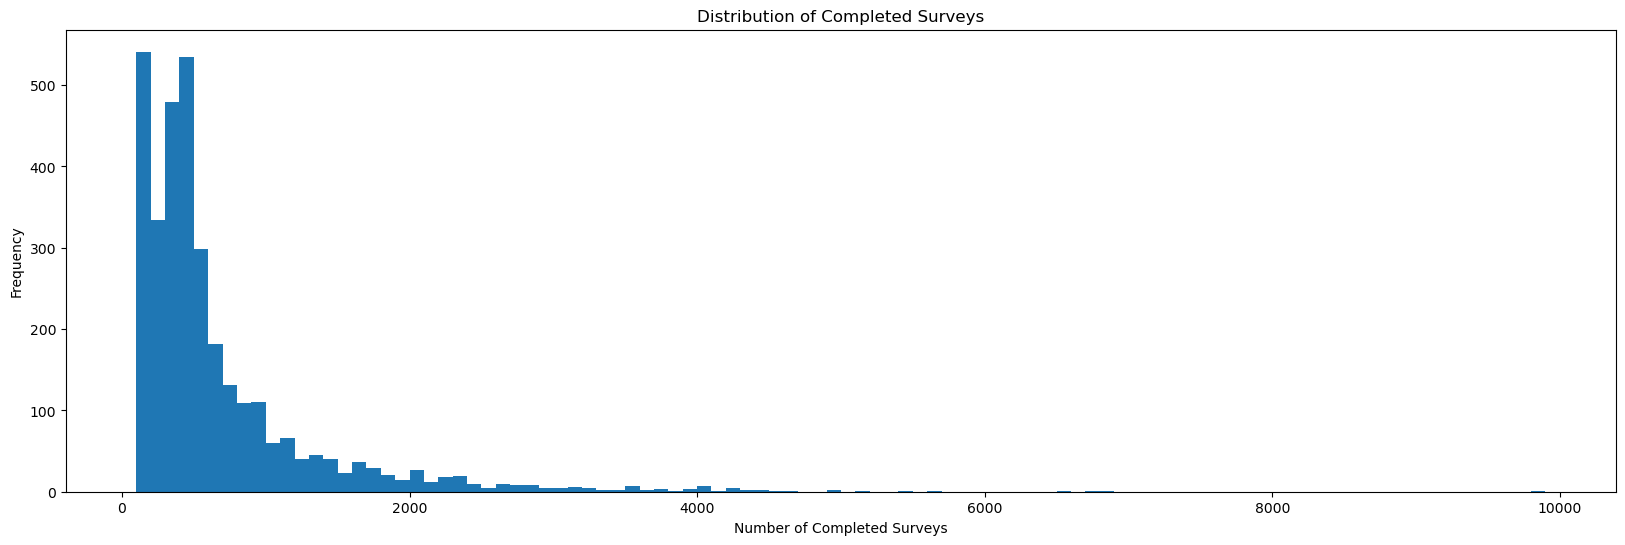

 This is the average number of completed surveys: 671.9133089133089
 This is the median of the completed surveys: 444.0
 This is the mode of the completed surveys: 0    422
Name: Number of Completed Surveys, dtype: int32
 This is the max surveys for a hospital obtained: 9887
 This is the min surveys for a hospital obtained: 100
 This is the standard deviation for survey count: 716.612197099645


In [10]:
min_value = CleanedDF_Hospital_Survey_Count_DF['Number of Completed Surveys'].min()
max_value = CleanedDF_Hospital_Survey_Count_DF['Number of Completed Surveys'].max()
standard_deviation = CleanedDF_Hospital_Survey_Count_DF['Number of Completed Surveys'].std()
#np.arange creates an array of values starting from min to max with increments of 100 till it reaches the max value +100
bins = np.arange(min_value, max_value + 100, 100)

plt.figure(figsize=(20, 6))
plt.hist(CleanedDF_Hospital_Survey_Count_DF['Number of Completed Surveys'], bins=bins)
plt.xlabel('Number of Completed Surveys')
plt.ylabel('Frequency')
plt.title('Distribution of Completed Surveys')
#print(f' This is the minimum number hospitals had survey data {min_value}')
plt.show()
print(f" This is the average number of completed surveys: {CleanedDF_Hospital_Survey_Count_DF['Number of Completed Surveys'].mean()}")
print(f" This is the median of the completed surveys: {CleanedDF_Hospital_Survey_Count_DF['Number of Completed Surveys'].median()}")
print(f" This is the mode of the completed surveys: {CleanedDF_Hospital_Survey_Count_DF['Number of Completed Surveys'].mode()}")
print(f" This is the max surveys for a hospital obtained: {max_value}")
print(f" This is the min surveys for a hospital obtained: {min_value}")
print(f" This is the standard deviation for survey count: {standard_deviation}")


## ^Most hospitals on average have just under 700 surveys completed. The median is 444 which indicates there is a lot of variability in the number of surveys completed overall. 

# Do number of surveys completed and hospital rating correlate?

In [11]:
cleaned_df_overall_hospital_rating = CleanedDF.loc[CleanedDF['HCAHPS Answer Description'] == 'Overall hospital rating - star rating']
cleaned_df_overall_hospital_rating = cleaned_df_overall_hospital_rating[['Facility ID','HCAHPS Answer Description','Patient Survey Star Rating','Number of Completed Surveys']]
cleaned_df_overall_hospital_rating

,Facility ID,HCAHPS Answer Description,Patient Survey Star Rating,Number of Completed Surveys
86,10001,Overall hospital rating - star rating,3,442
179,10005,Overall hospital rating - star rating,3,758
272,10006,Overall hospital rating - star rating,2,1311
365,10007,Overall hospital rating - star rating,3,166
551,10011,Overall hospital rating - star rating,4,2016
...,...,...,...,...
448625,670122,Overall hospital rating - star rating,4,2089
448904,670128,Overall hospital rating - star rating,5,140
449741,670260,Overall hospital rating - star rating,5,480
450206,670300,Overall hospital rating - star rating,4,210


In [12]:
top_hospital_count = cleaned_df_overall_hospital_rating.groupby(['HCAHPS Answer Description',\
                            'Patient Survey Star Rating'])['Number of Completed Surveys'].median().reset_index()
top_hospital_count


,HCAHPS Answer Description,Patient Survey Star Rating,Number of Completed Surveys
0,Overall hospital rating - star rating,1,431.0
1,Overall hospital rating - star rating,2,466.0
2,Overall hospital rating - star rating,3,481.5
3,Overall hospital rating - star rating,4,445.5
4,Overall hospital rating - star rating,5,248.5


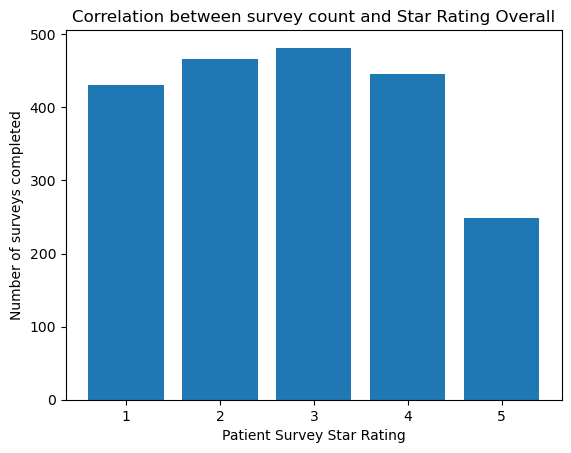

In [13]:
plt.bar(top_hospital_count['Patient Survey Star Rating'],top_hospital_count['Number of Completed Surveys'])
plt.ylabel('Number of surveys completed')
plt.xlabel('Patient Survey Star Rating')
plt.title('Correlation between survey count and Star Rating Overall')
plt.show()

### Why do 5 star rated hospitals have less surveys completed by patients? One star to 4 star rated hospitals have more surveys completed.

In [14]:
Top_Rated_Hospitals_DF_count = pd.merge(Top_Rated_Hospitals, CleanedDF_Hospital_Survey_Count_DF, how = 'inner', on = 'Facility ID')
Top_Rated_Hospitals_DF_count

,Facility ID,Facility Name,Hospital Type,Hospital overall rating,Number of Completed Surveys
0,10065,RUSSELL MEDICAL CENTER,Acute Care Hospitals,5.0,351
1,10108,PRATTVILLE BAPTIST HOSPITAL,Acute Care Hospitals,5.0,568
2,10125,LAKELAND COMMUNITY HOSPITAL,Acute Care Hospitals,5.0,105
3,30062,SUMMIT HEALTHCARE REGIONAL MEDICAL CENTER,Acute Care Hospitals,5.0,398
4,30103,MAYO CLINIC HOSPITAL,Acute Care Hospitals,5.0,990
...,...,...,...,...,...
401,670044,TEXAS HEALTH PRESBYTERIAN HOSPITAL ROCKWALL,Acute Care Hospitals,5.0,495
402,670056,ASCENSION SETON HAYS,Acute Care Hospitals,5.0,1606
403,670071,TEXAS HEALTH HEART & VASCULAR HOSPITAL ARLINGTON,Acute Care Hospitals,5.0,232
404,670085,TEXAS HEALTH HARRIS METHODIST HOSPITAL ALLIANCE,Acute Care Hospitals,5.0,441


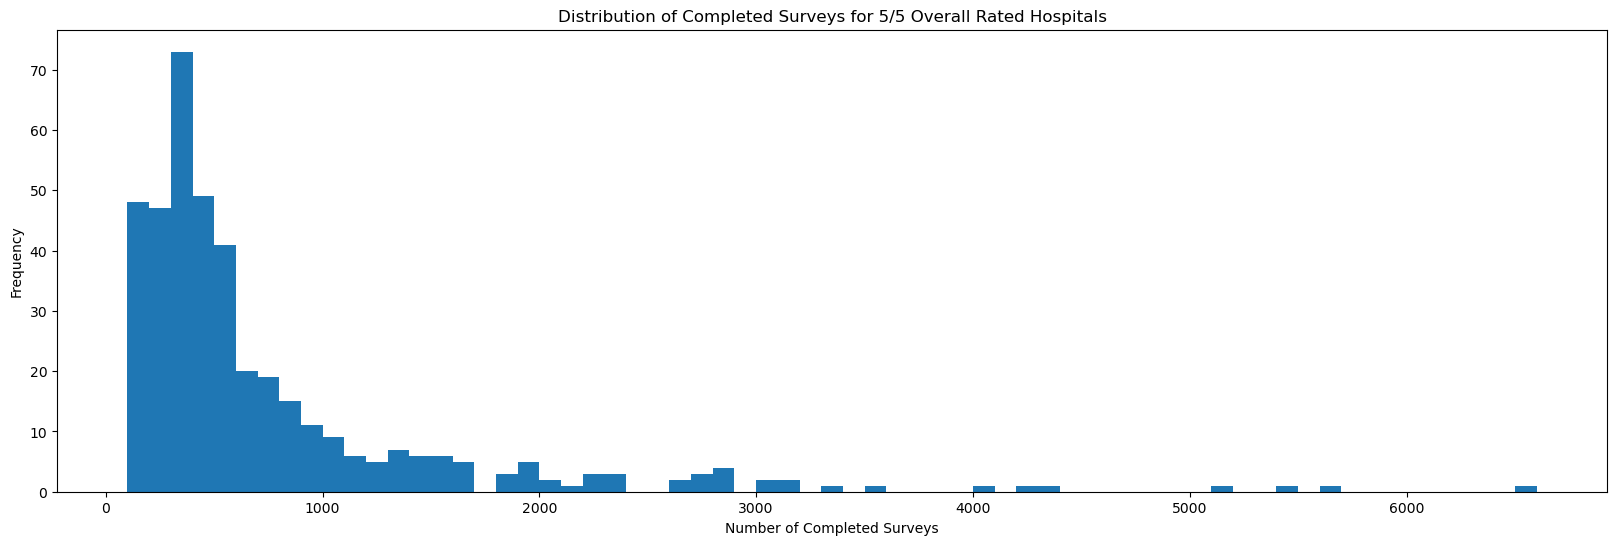

In [15]:
min_value = Top_Rated_Hospitals_DF_count['Number of Completed Surveys'].min()
max_value = Top_Rated_Hospitals_DF_count['Number of Completed Surveys'].max()
bin_edges = np.arange(min_value, max_value + 100, 100)

plt.figure(figsize=(20, 6))
plt.hist(Top_Rated_Hospitals_DF_count['Number of Completed Surveys'], bins=bin_edges)
plt.xlabel('Number of Completed Surveys')
plt.ylabel('Frequency')
plt.title('Distribution of Completed Surveys for 5/5 Overall Rated Hospitals')
plt.show()

There is a lot of variation in the number of reported surveys for all hospitals. The distribution is similar between 1 star rated hospitals and 5 star rated hospitals

## --------------------------------------------------------------------------------------------------------------------------------------
# Hospital Consumer Assessment of Healthcare Providers and Systems (HCAHPS) Patient Survey

The HCAHPS Patient Survey, also known as the CAHPS® Hospital Survey or Hospital CAHPS, is a survey
instrument and data collection methodology for measuring patients’ perceptions of their hospital experience.
The survey is administered to a random sample of adult inpatients after discharge. The HCAHPS survey
contains patient perspectives on care and patient rating items that encompass key topics: communication with
hospital staff, responsiveness of hospital staff, communication about medicines, discharge information,
cleanliness of hospital environment, quietness of hospital environment, and transition of care. The survey also
Downloadable Database Dictionary April 2023 Page 7 of 104
includes screening questions and demographic items, which are used for adjusting the mix of patients across
hospitals and for analytic purposes. See Appendix C – HCAHPS Survey Questions Listing
section for a full list of current HCAHPS Survey items included in the downloadable databases. More
information about the HCAHPS Survey, including a complete list of survey questions, can be found on the
official HCAHPS website

In [16]:
#CleanedDF_1000 = CleanedDF.loc[CleanedDF['Number of Completed Surveys'] >= 1000]
CleanedDF_1000 = CleanedDF.copy()
CleanedDF_1000

,Facility ID,Facility Name,HCAHPS Measure ID,HCAHPS Answer Description,Patient Survey Star Rating,Number of Completed Surveys
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_COMP_1_STAR_RATING,Nurse communication - star rating,3,442
18,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_COMP_2_STAR_RATING,Doctor communication - star rating,4,442
32,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_COMP_3_STAR_RATING,Staff responsiveness - star rating,2,442
43,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_COMP_5_STAR_RATING,Communication about medicines - star rating,4,442
53,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_COMP_6_STAR_RATING,Discharge information - star rating,4,442
...,...,...,...,...,...,...
450289,670309,TEXAS HEALTH HOSPITAL MANSFIELD,H_CLEAN_STAR_RATING,Cleanliness - star rating,4,177
450294,670309,TEXAS HEALTH HOSPITAL MANSFIELD,H_QUIET_STAR_RATING,Quietness - star rating,5,177
450299,670309,TEXAS HEALTH HOSPITAL MANSFIELD,H_HSP_RATING_STAR_RATING,Overall hospital rating - star rating,4,177
450304,670309,TEXAS HEALTH HOSPITAL MANSFIELD,H_RECMND_STAR_RATING,Recommend hospital - star rating,5,177


In [17]:
# Create an empty dictionary to store running total and count for each HCAHPS Answer Description
average_ratings = {}

# Iterate over the rows in the cleaned dataframe
for index, row in CleanedDF_1000.iterrows():
    answer_description = row['HCAHPS Answer Description']
    rating = int(row['Patient Survey Star Rating']) 
    if answer_description not in average_ratings:
        average_ratings[answer_description] = {
            'total_rating': 0,
            'count': 0,
            'ratings': [] #this is to get the median
        }

    average_ratings[answer_description]['total_rating'] += rating
    average_ratings[answer_description]['count'] += 1
    average_ratings[answer_description]['ratings'].append(rating)  
#this below is for the dataframe
answer_desc_list = []
average_rating_list = []
median_rating_list = []  

# Calculating the average and median rating for each answer description
for answer_description, data in average_ratings.items():
    total_rating = data['total_rating']
    count = data['count']
    average_rating = total_rating / count

    answer_desc_list.append(answer_description)
    average_rating_list.append(average_rating)

    ratings = data['ratings']
    median_rating = statistics.median(ratings)  # Calculate the median rating
    median_rating_list.append(median_rating)

average_ratings_df = pd.DataFrame({
    'Answer Description': answer_desc_list,
    'Average Rating': average_rating_list,
    'Median Rating': median_rating_list  # Add the median rating column
})
average_ratings_df

,Answer Description,Average Rating,Median Rating
0,Nurse communication - star rating,3.212759,3.0
1,Doctor communication - star rating,3.317766,3.0
2,Staff responsiveness - star rating,3.063797,3.0
3,Communication about medicines - star rating,3.221306,3.0
4,Discharge information - star rating,3.525336,4.0
5,Care transition - star rating,3.078449,3.0
6,Cleanliness - star rating,3.376984,4.0
7,Quietness - star rating,3.116606,3.0
8,Overall hospital rating - star rating,3.383089,3.0
9,Recommend hospital - star rating,3.524420,4.0


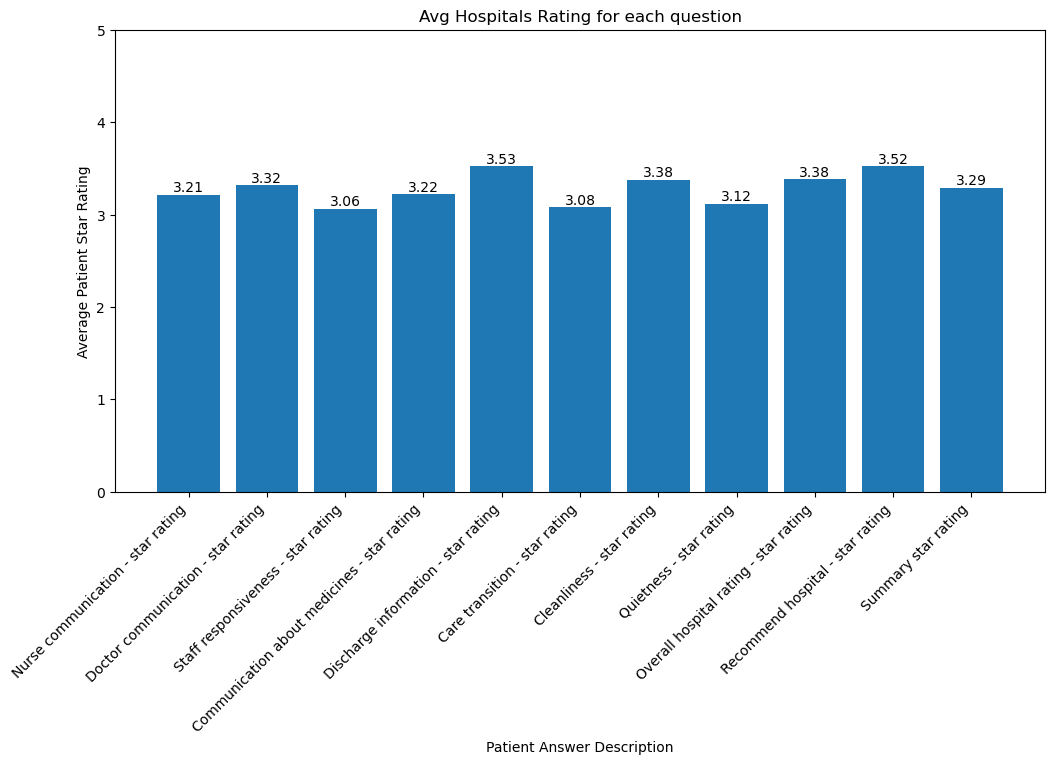

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(average_ratings_df['Answer Description'], average_ratings_df['Average Rating'])
ax.set_xlabel('Patient Answer Description')
ax.set_ylabel('Average Patient Star Rating')
ax.set_title('Avg Hospitals Rating for each question')
plt.xticks(rotation=45, ha='right')
ax.set_ylim(0, 5)  # Set the y-axis range from 0 to 5
ax.bar_label(bars, fmt='%.2f', label_type='edge')

plt.show()


# Patient Experience 
#### As shown above the top 3 major measures most affecting patient experience negatively is Staff Responsiveness, Care Transition, and Quiteness. In the data below we will be looking at summary star rating. The Summary star rating is a summary rating if the patient would or would not recommend the hospital based on their experience. This measure will tell us of the patient had a good or bad experience. This lets us see if a patient recommending the hospital correlates with higher rated overall hospitals. Overall hospital ratings are calculated by the center for mediicare and medicaid which is the U.S government insurance agency for retiree's and disabled.

In [19]:
# This is the recommendation dataframe

Recommend_Hospital_df = CleanedDF.loc[(CleanedDF['HCAHPS Answer Description']  == 'Summary star rating')]
Recommend_Hospital_df = Recommend_Hospital_df[['Facility ID','HCAHPS Answer Description','Patient Survey Star Rating','Number of Completed Surveys']]
Recommend_Hospital_df


,Facility ID,HCAHPS Answer Description,Patient Survey Star Rating,Number of Completed Surveys
92,10001,Summary star rating,4,442
185,10005,Summary star rating,3,758
278,10006,Summary star rating,2,1311
371,10007,Summary star rating,4,166
557,10011,Summary star rating,4,2016
...,...,...,...,...
448631,670122,Summary star rating,4,2089
448910,670128,Summary star rating,4,140
449747,670260,Summary star rating,4,480
450212,670300,Summary star rating,4,210


In [20]:
# This is the merged recommendation dataframe and overall hospital rating dataframe

Overall_ratings_Hospital_DF = Hospital_General_DataFrame_Focused[['Facility ID','Hospital overall rating']]
CleanedDF_Overall_Ratings_df = Overall_ratings_Hospital_DF.replace(['Not Available'], np.nan)
CleanedDF_Overall_Ratings_df = CleanedDF_Overall_Ratings_df.dropna()

recommend_overall_rating_df_merged = pd.merge(Recommend_Hospital_df, CleanedDF_Overall_Ratings_df, how = 'inner', on = 'Facility ID')
recommend_overall_rating_df_merged['Patient Survey Star Rating'] = recommend_overall_rating_df_merged['Patient Survey Star Rating'].astype(int)
recommend_overall_rating_df_merged

,Facility ID,HCAHPS Answer Description,Patient Survey Star Rating,Number of Completed Surveys,Hospital overall rating
0,10001,Summary star rating,4,442,3
1,10005,Summary star rating,3,758,3
2,10006,Summary star rating,2,1311,2
3,10007,Summary star rating,4,166,3
4,10011,Summary star rating,4,2016,2
...,...,...,...,...,...
2835,670103,Summary star rating,3,448,4
2836,670106,Summary star rating,3,273,1
2837,670108,Summary star rating,4,349,5
2838,670120,Summary star rating,2,552,3


In [21]:
recommend_df = recommend_overall_rating_df_merged.groupby(['HCAHPS Answer Description',\
                            'Hospital overall rating'])['Patient Survey Star Rating'].mean().reset_index()
recommend_df


,HCAHPS Answer Description,Hospital overall rating,Patient Survey Star Rating
0,Summary star rating,1,2.178571
1,Summary star rating,2,2.754747
2,Summary star rating,3,3.150062
3,Summary star rating,4,3.431181
4,Summary star rating,5,3.736453


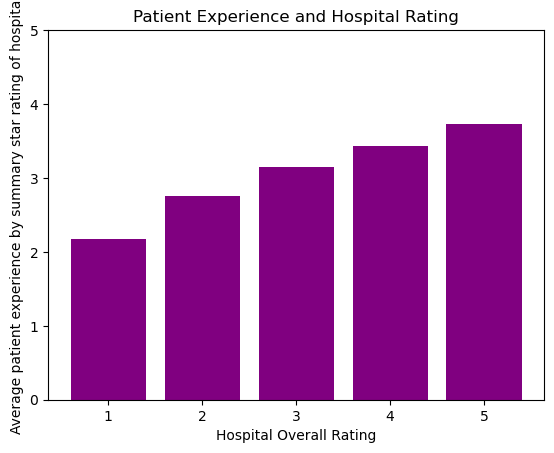

In [22]:
plt.bar(recommend_df['Hospital overall rating'],recommend_df['Patient Survey Star Rating'], color = 'purple')
plt.ylabel('Average patient experience by summary star rating of hospital')
plt.xlabel('Hospital Overall Rating')
plt.title('Patient Experience and Hospital Rating')
plt.yticks([0,1,2,3,4,5])
plt.savefig('Patient_Experience_vs_Hospital_Rating.png')
plt.show()

## In the above chart patient's tend to recommend hospitals higher rated hospitals over lower ones. The correlation increases the higher the hospital overall rating is 

In [23]:
# This is the dataframe on patients recommending the hospital. 

Recommend_Hospital_df_C = Recommend_Hospital_df.groupby(['HCAHPS Answer Description',\
                            'Patient Survey Star Rating'])['Number of Completed Surveys'].median().reset_index()
Recommend_Hospital_df_C

,HCAHPS Answer Description,Patient Survey Star Rating,Number of Completed Surveys
0,Summary star rating,1,434.0
1,Summary star rating,2,495.0
2,Summary star rating,3,517.0
3,Summary star rating,4,394.0
4,Summary star rating,5,210.0


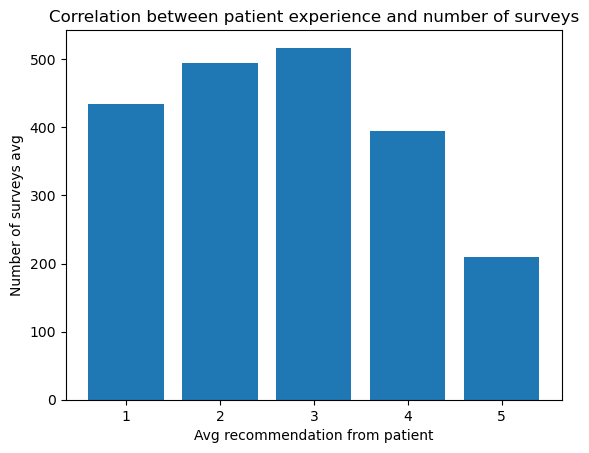

In [24]:
plt.bar(Recommend_Hospital_df_C['Patient Survey Star Rating'],Recommend_Hospital_df_C['Number of Completed Surveys'])
plt.ylabel('Number of surveys avg')
plt.xlabel('Avg recommendation from patient')
plt.title('Correlation between patient experience and number of surveys')

plt.show()

Patient's recommending 5 star rated hosptitals are much lower than the rest of the groups. This means it's hard to find highly recommended hospitals. 

### Timely and Effective Care: Process of Care Measures
### Description/Background
### The measures of timely and effective care (also known as “process of care” measures) show the percentage of
hospital patients who got treatments known to get the best results for certain common, serious medical
conditions or surgical procedures; how quickly hospitals treat patients who come to the hospital with certain
medical emergencies; and how well hospitals provide preventive services. These measures only apply to
patients for whom the recommended treatment would be appropriate. The measures of timely and effective
care apply to adults and children treated at hospitals paid under the Inpatient Prospective Payment System
(IPPS) or the Outpatient Prospective Payment System (OPPS), as well as those that voluntarily report data on
measures for whom the recommended treatments would be appropriate including: Medicare patients, Medicare
managed care patients, and non-Medicare patients. Timely and effective care measures include severe sepsis
and septic shock, COVID-19 Vaccination, cataract care follow-up, colonoscopy follow-up, heart attack care,
preventive care, cancer care measures, stroke, and venous thromboembolism.


In [25]:
Timeliness_Effective_Path = Path("Timely_and_Effective_Care-Hospital.csv")
Timeliness_Effective_Df = pd.read_csv(Timeliness_Effective_Path, encoding='latin-1')
Timeliness_Effective_Df


,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Start Date,End Date
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Emergency Department,EDV,Emergency department volume,high,NaN,NaN,1/1/2021,12/31/2021
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Electronic Clinical Quality Measure,ED_2_Strata_1,Admit Decision Time to ED Departure Time for A...,Not Available,Not Available,5,1/1/2021,12/31/2021
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Electronic Clinical Quality Measure,ED_2_Strata_2,Admit Decision Time to ED Departure Time for A...,Not Available,Not Available,5,1/1/2021,12/31/2021
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Healthcare Personnel Vaccination,HCP_COVID_19,Percentage of healthcare personnel who complet...,83.8,2351,NaN,4/1/2022,6/30/2022
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Healthcare Personnel Vaccination,IMM_3,Healthcare workers given influenza vaccination,97,3795,NaN,10/1/2021,3/31/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115787,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,Electronic Clinical Quality Measure,STK_03,Anticoagulation Therapy for Atrial Fibrillatio...,Not Available,Not Available,5,1/1/2021,12/31/2021
115788,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,Electronic Clinical Quality Measure,STK_05,Antithrombotic Therapy by End of Hospital Day 2,Not Available,Not Available,5,1/1/2021,12/31/2021
115789,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,Electronic Clinical Quality Measure,STK_06,Discharged on Statin Medication,Not Available,Not Available,5,1/1/2021,12/31/2021
115790,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,Electronic Clinical Quality Measure,VTE_1,Venous Thromboembolism Prophylaxis,Not Available,Not Available,5,1/1/2021,12/31/2021


In [26]:
Timeliness_Effective_Df.keys()

Index(['Facility ID', 'Facility Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Condition', 'Measure ID',
       'Measure Name', 'Score', 'Sample', 'Footnote', 'Start Date',
       'End Date'],
      dtype='object')

In [27]:
x = "Average (median) time patients spent in the emergency department before leaving from the visit A lower number of minutes is better"
Timeliness_Effective_Df_filtered = Timeliness_Effective_Df.loc[Timeliness_Effective_Df['Measure Name'] == x]
Timeliness_Effective_Df_filtered = Timeliness_Effective_Df_filtered.replace(['Not Available'], np.nan)
Timeliness_Effective_Df_filtered = Timeliness_Effective_Df_filtered[['Facility ID','Facility Name','Measure Name','Score']]
Timeliness_Effective_Df_filtered = Timeliness_Effective_Df_filtered.dropna()
Timeliness_Effective_Df_filtered['Score'] = pd.to_numeric(Timeliness_Effective_Df_filtered['Score'])
Timeliness_Effective_Df_filtered

,Facility ID,Facility Name,Measure Name,Score
5,10001,SOUTHEAST HEALTH MEDICAL CENTER,Average (median) time patients spent in the em...,192
30,10005,MARSHALL MEDICAL CENTERS,Average (median) time patients spent in the em...,148
55,10006,NORTH ALABAMA MEDICAL CENTER,Average (median) time patients spent in the em...,142
80,10007,MIZELL MEMORIAL HOSPITAL,Average (median) time patients spent in the em...,123
105,10008,CRENSHAW COMMUNITY HOSPITAL,Average (median) time patients spent in the em...,126
...,...,...,...,...
115606,670267,THE WOODLANDS SPECIALTY HOSPITAL,Average (median) time patients spent in the em...,136
115647,670285,KINGWOOD EMERGENCY HOSPITAL,Average (median) time patients spent in the em...,112
115672,670300,METHODIST MIDLOTHIAN MEDICAL CENTER,Average (median) time patients spent in the em...,132
115697,670309,TEXAS HEALTH HOSPITAL MANSFIELD,Average (median) time patients spent in the em...,150


In [28]:
#filtered by summary_star_rating survey
Summary_Star_Rating = CleanedDF.loc[CleanedDF['HCAHPS Answer Description'] == 'Overall hospital rating - star rating']
Summary_Star_Rating = Summary_Star_Rating[['Facility ID','HCAHPS Answer Description','Patient Survey Star Rating']]
Summary_Star_Rating 

,Facility ID,HCAHPS Answer Description,Patient Survey Star Rating
86,10001,Overall hospital rating - star rating,3
179,10005,Overall hospital rating - star rating,3
272,10006,Overall hospital rating - star rating,2
365,10007,Overall hospital rating - star rating,3
551,10011,Overall hospital rating - star rating,4
...,...,...,...
448625,670122,Overall hospital rating - star rating,4
448904,670128,Overall hospital rating - star rating,5
449741,670260,Overall hospital rating - star rating,5
450206,670300,Overall hospital rating - star rating,4


In [29]:
# merge star rating and timeliness tables

Timeliness_Star_Rating = pd.merge(Timeliness_Effective_Df_filtered, Summary_Star_Rating, how = 'inner', on = 'Facility ID')
Timeliness_Star_Rating = Timeliness_Star_Rating.rename(columns={"Score": "Time(min)"})
Timeliness_Star_Rating

,Facility ID,Facility Name,Measure Name,Time(min),HCAHPS Answer Description,Patient Survey Star Rating
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,Average (median) time patients spent in the em...,192,Overall hospital rating - star rating,3
1,10005,MARSHALL MEDICAL CENTERS,Average (median) time patients spent in the em...,148,Overall hospital rating - star rating,3
2,10006,NORTH ALABAMA MEDICAL CENTER,Average (median) time patients spent in the em...,142,Overall hospital rating - star rating,2
3,10007,MIZELL MEMORIAL HOSPITAL,Average (median) time patients spent in the em...,123,Overall hospital rating - star rating,3
4,10011,ST. VINCENT'S EAST,Average (median) time patients spent in the em...,195,Overall hospital rating - star rating,4
...,...,...,...,...,...,...
2991,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Average (median) time patients spent in the em...,205,Overall hospital rating - star rating,4
2992,670128,BAYLOR SCOTT & WHITE MEDICAL CENTER PFLUGERVILLE,Average (median) time patients spent in the em...,160,Overall hospital rating - star rating,5
2993,670260,TEXAS HEALTH HOSPITAL FRISCO,Average (median) time patients spent in the em...,159,Overall hospital rating - star rating,5
2994,670300,METHODIST MIDLOTHIAN MEDICAL CENTER,Average (median) time patients spent in the em...,132,Overall hospital rating - star rating,4


In [30]:
Summary_Star_Rating_group = Timeliness_Star_Rating.groupby(['Measure Name',\
                            'Patient Survey Star Rating'])['Time(min)'].mean().reset_index()
Summary_Star_Rating_group

,Measure Name,Patient Survey Star Rating,Time(min)
0,Average (median) time patients spent in the em...,1,185.111111
1,Average (median) time patients spent in the em...,2,193.104478
2,Average (median) time patients spent in the em...,3,179.417044
3,Average (median) time patients spent in the em...,4,171.705004
4,Average (median) time patients spent in the em...,5,144.774336


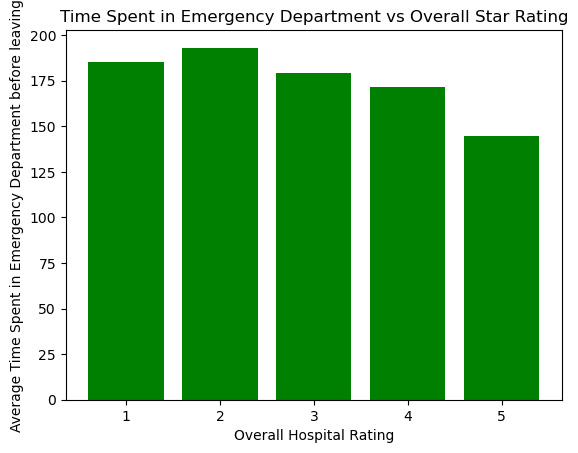

In [31]:
#plot out each by hospital quality rating

plt.bar(Summary_Star_Rating_group['Patient Survey Star Rating'],Summary_Star_Rating_group['Time(min)'], color = 'green')
plt.ylabel('Average Time Spent in Emergency Department before leaving')
plt.xlabel('Overall Hospital Rating')
plt.title('Time Spent in Emergency Department vs Overall Star Rating')
plt.savefig('Timeliness_vs_Overall_Rating.png')
plt.show()

 This is the median time= 153.0
 This is the average time= 160.41897523902918


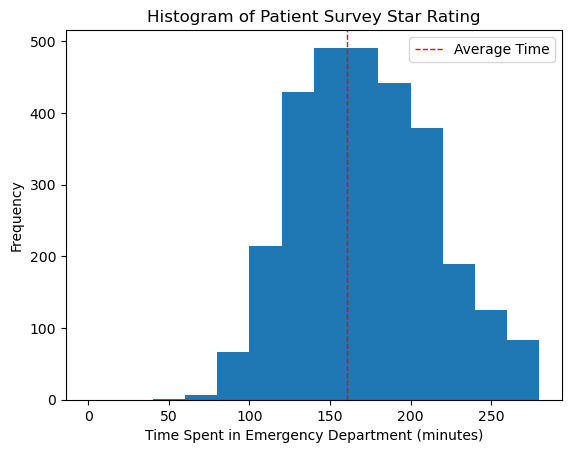

In [32]:
Median_time = Timeliness_Effective_Df_filtered["Score"].median()
Average_time = Timeliness_Effective_Df_filtered["Score"].mean()
print(f' This is the median time= {Median_time}')
print(f' This is the average time= {Average_time}')


bin_range = range(0, 300, 20)

plt.hist(Timeliness_Star_Rating['Time(min)'], bins=bin_range)
plt.xlabel('Time Spent in Emergency Department (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Patient Survey Star Rating')
plt.axvline(Average_time, color='red', linestyle='dashed', linewidth=1, label='Average Time')
plt.legend()

plt.show()

Above charts - correlation shows higher rated hospitals (5/5) tend to have lower time spent in the emergency department (144min) (create a trend line in the bar graph displaying the r^2 value and the r line)****. The average time it takes for patients to leave the hospital is 160mins. This suggests hospitals should lower the time the patient stays in emergency department to have higher overall ratings

(use statistics, p_value/t-test/chi etc )

## --------------------------------------------------------------------------------------------------------------------------------------

# Timeliness and Patient Experience correlation

In [33]:
Timeliness_df = Timeliness_Star_Rating[['Facility ID','Time(min)']]
Timeliness_df

,Facility ID,Time(min)
0,10001,192
1,10005,148
2,10006,142
3,10007,123
4,10011,195
...,...,...
2991,670122,205
2992,670128,160
2993,670260,159
2994,670300,132


In [34]:
Recommend_Timeliness_Rating = pd.merge(Recommend_Hospital_df, Timeliness_df, how = 'inner', on = 'Facility ID')
Recommend_Timeliness_Rating

,Facility ID,HCAHPS Answer Description,Patient Survey Star Rating,Number of Completed Surveys,Time(min)
0,10001,Summary star rating,4,442,192
1,10005,Summary star rating,3,758,148
2,10006,Summary star rating,2,1311,142
3,10007,Summary star rating,4,166,123
4,10011,Summary star rating,4,2016,195
...,...,...,...,...,...
2991,670122,Summary star rating,4,2089,205
2992,670128,Summary star rating,4,140,160
2993,670260,Summary star rating,4,480,159
2994,670300,Summary star rating,4,210,132


In [35]:
Recommend_Timeliness_Rating_groupby = Recommend_Timeliness_Rating.groupby(['HCAHPS Answer Description',\
                            'Patient Survey Star Rating'])['Time(min)'].mean().reset_index()
Recommend_Timeliness_Rating_groupby

,HCAHPS Answer Description,Patient Survey Star Rating,Time(min)
0,Summary star rating,1,187.400000
1,Summary star rating,2,191.335306
2,Summary star rating,3,185.063714
3,Summary star rating,4,163.077882
4,Summary star rating,5,130.637931


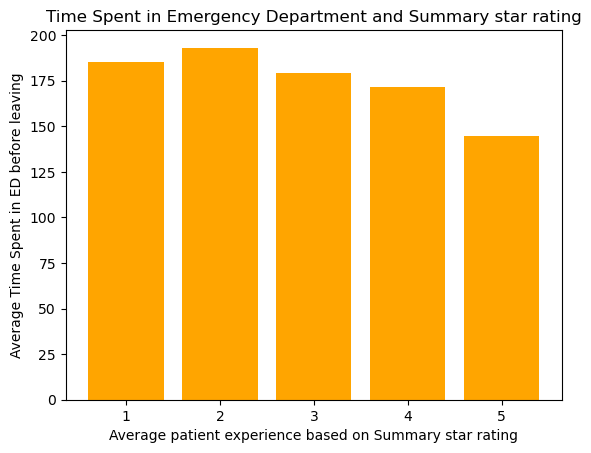

 This is the median time= 153.0
 This is the average time= 160.41897523902918


In [36]:
plt.bar(Recommend_Timeliness_Rating_groupby['Patient Survey Star Rating'],Summary_Star_Rating_group['Time(min)'],color = 'orange')
plt.ylabel('Average Time Spent in ED before leaving')
plt.xlabel('Average patient experience based on Summary star rating')
plt.title('Time Spent in Emergency Department and Summary star rating')
plt.savefig('Timespent and Patient Experience.png')
plt.show()
print(f' This is the median time= {Median_time}')
print(f' This is the average time= {Average_time}')


In [37]:
Rated_Hospitals_prep = Hospital_Overall_Rating[['Facility ID', 'Hospital overall rating']]
Rated_Hospitals_prep

,Facility ID,Hospital overall rating
0,10001,3.0
1,10005,3.0
2,10006,2.0
3,10007,3.0
5,10011,2.0
...,...,...
5285,670103,4.0
5286,670106,1.0
5288,670108,5.0
5293,670120,3.0


In the above chart you can see that the average time spent in the ED is less for 4 and 5 star recommended rated hospitals. 5 star rated hospitals are shown to have much lower times spent vs lower rated hospitals. 

In [38]:
Recommend_Hospital_dff = CleanedDF.loc[(CleanedDF['HCAHPS Answer Description']  == 'Recommend hospital - star rating')]
#Recommend_Hospital_dff = Recommend_Hospital_dff[['Facility ID','HCAHPS Answer Description','Patient Survey Star Rating','Number of Completed Surveys']]
Recommend_Hospital_dfff = pd.merge(Recommend_Hospital_dff, Rated_Hospitals_prep, how = 'inner', on = 'Facility ID')
Recommend_Hospital_dfff

,Facility ID,Facility Name,HCAHPS Measure ID,HCAHPS Answer Description,Patient Survey Star Rating,Number of Completed Surveys,Hospital overall rating
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_RECMND_STAR_RATING,Recommend hospital - star rating,4,442,3.0
1,10005,MARSHALL MEDICAL CENTERS,H_RECMND_STAR_RATING,Recommend hospital - star rating,3,758,3.0
2,10006,NORTH ALABAMA MEDICAL CENTER,H_RECMND_STAR_RATING,Recommend hospital - star rating,2,1311,2.0
3,10007,MIZELL MEMORIAL HOSPITAL,H_RECMND_STAR_RATING,Recommend hospital - star rating,4,166,3.0
4,10011,ST. VINCENT'S EAST,H_RECMND_STAR_RATING,Recommend hospital - star rating,4,2016,2.0
...,...,...,...,...,...,...,...
2835,670103,MEDICAL CITY ALLIANCE,H_RECMND_STAR_RATING,Recommend hospital - star rating,4,448,4.0
2836,670106,HCA HOUSTON HEALTHCARE PEARLAND,H_RECMND_STAR_RATING,Recommend hospital - star rating,3,273,1.0
2837,670108,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,H_RECMND_STAR_RATING,Recommend hospital - star rating,5,349,5.0
2838,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,H_RECMND_STAR_RATING,Recommend hospital - star rating,3,552,3.0


In [39]:
recommending_rating_df = Recommend_Hospital_dfff.groupby(['HCAHPS Answer Description', \
                                                          'Patient Survey Star Rating'])['Hospital overall rating'].mean().reset_index()
recommending_rating_df

,HCAHPS Answer Description,Patient Survey Star Rating,Hospital overall rating
0,Recommend hospital - star rating,1,2.000000
1,Recommend hospital - star rating,2,2.380615
2,Recommend hospital - star rating,3,3.033831
3,Recommend hospital - star rating,4,3.553191
4,Recommend hospital - star rating,5,4.101990


In [40]:
Timeliness_Star_Rating_recommend_prep = Timeliness_Star_Rating[['Facility ID','Time(min)']]
Timeliness_Star_Rating_recommend_merge = pd.merge(Recommend_Hospital_dfff,Timeliness_Star_Rating_recommend_prep,how = 'inner', on = 'Facility ID')
Timeliness_Star_Rating_recommend_merge

,Facility ID,Facility Name,HCAHPS Measure ID,HCAHPS Answer Description,Patient Survey Star Rating,Number of Completed Surveys,Hospital overall rating,Time(min)
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,H_RECMND_STAR_RATING,Recommend hospital - star rating,4,442,3.0,192
1,10005,MARSHALL MEDICAL CENTERS,H_RECMND_STAR_RATING,Recommend hospital - star rating,3,758,3.0,148
2,10006,NORTH ALABAMA MEDICAL CENTER,H_RECMND_STAR_RATING,Recommend hospital - star rating,2,1311,2.0,142
3,10007,MIZELL MEMORIAL HOSPITAL,H_RECMND_STAR_RATING,Recommend hospital - star rating,4,166,3.0,123
4,10011,ST. VINCENT'S EAST,H_RECMND_STAR_RATING,Recommend hospital - star rating,4,2016,2.0,195
...,...,...,...,...,...,...,...,...
2766,670103,MEDICAL CITY ALLIANCE,H_RECMND_STAR_RATING,Recommend hospital - star rating,4,448,4.0,113
2767,670106,HCA HOUSTON HEALTHCARE PEARLAND,H_RECMND_STAR_RATING,Recommend hospital - star rating,3,273,1.0,138
2768,670108,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,H_RECMND_STAR_RATING,Recommend hospital - star rating,5,349,5.0,159
2769,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,H_RECMND_STAR_RATING,Recommend hospital - star rating,3,552,3.0,183


In [41]:
recommending_time_groupby = Timeliness_Star_Rating_recommend_merge.groupby(['HCAHPS Answer Description', \
                                                          'Patient Survey Star Rating'])['Time(min)'].mean().reset_index()
recommending_time_groupby

,HCAHPS Answer Description,Patient Survey Star Rating,Time(min)
0,Recommend hospital - star rating,1,190.328571
1,Recommend hospital - star rating,2,181.419431
2,Recommend hospital - star rating,3,179.657286
3,Recommend hospital - star rating,4,178.779476
4,Recommend hospital - star rating,5,173.557065


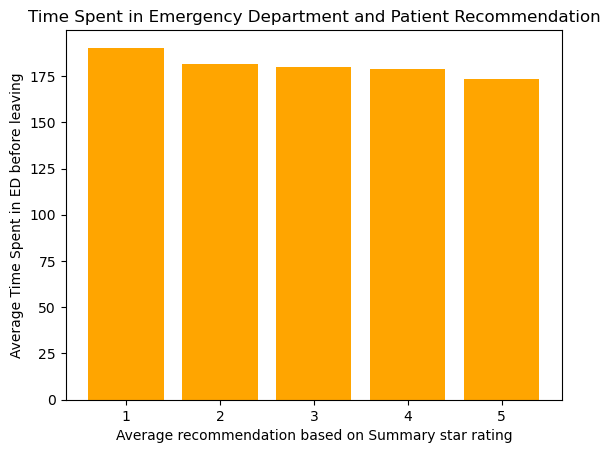

 This is the median time= 153.0
 This is the average time= 160.41897523902918


In [42]:
plt.bar(recommending_time_groupby['Patient Survey Star Rating'],recommending_time_groupby['Time(min)'],color = 'orange')
plt.ylabel('Average Time Spent in ED before leaving')
plt.xlabel('Average recommendation based on Summary star rating')
plt.title('Time Spent in Emergency Department and Patient Recommendation')
plt.savefig('Timespent and Patient Recommendation.png')
plt.show()
print(f' This is the median time= {Median_time}')
print(f' This is the average time= {Average_time}')


# -----------------------------------------------------------------------------------------------------------------
# Mortality of Care (inpatient)

Complications: 30-Day Mortality Measures
Description/Background

The 30-day death measures are estimates of deaths within 30 days of the start of a hospital admission from any
cause related to medical conditions, including heart attack (AMI), heart failure (HF), pneumonia (PN), chronic
obstructive pulmonary disease (COPD), and stroke; as well as surgical procedures, including coronary artery
bypass graft (CABG). Hospitals’ rates are compared to the national rate to determine if hospitals’ performance
on these measures is better than the national rate (lower), no different than the national rate, or worse than the
national rate (higher). For some hospitals, the number of cases is too small to reliably compare their results to
the national average rate. CMS chose to **measure death within 30 days instead of inpatient deaths to use a more consistent measurement time window because length of hospital stay varies across patients and hospitals.**
Rates are provided in the downloadable databases and presented on the Hospital Care Compare website as
percentages. Lower rates for mortality are better.
Note that the rates for the heart attack (AMI), heart failure (HF), pneumonia (PN), chronic obstructive
pulmonary disease (COPD), and coronary artery bypass graft (CABG) mortality measures included in the
Hospital Value-Based Purchasing (HVBP) Program dataset are survival rates, not death rates. 

The measure follow-up period is 30 days for: death, surgical site bleeding, and
pulmonary embolism as rates of these complications are elevated until
approximately 30 days post admission to the index hospital.

In [43]:
csv_Mort_Path = Path("Complications_and_Deaths-Hospital.csv")
Complications_Death_DF = pd.read_csv(csv_Mort_Path)
Complications_Death_DF.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Start Date,End Date
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,102,2.4,1.4,4.2,NaN,4/1/2018,3/31/2021
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,317,12.4,9.8,15.4,NaN,7/1/2018,6/30/2021
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,172,4.7,2.7,7.8,NaN,7/1/2018,6/30/2021
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,182,8.5,6,12.1,NaN,7/1/2018,6/30/2021
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_HF,Death rate for heart failure patients,Better Than the National Rate,630,8.3,6.6,10.3,NaN,7/1/2018,6/30/2021


In [44]:
Death_Df_focused = Complications_Death_DF[['Facility ID','Facility Name','Measure Name','Compared to National','Score']]
Death_Df_focused

,Facility ID,Facility Name,Measure Name,Compared to National,Score
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,Rate of complications for hip/knee replacement...,No Different Than the National Rate,2.4
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for heart attack patients,No Different Than the National Rate,12.4
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for CABG surgery patients,No Different Than the National Rate,4.7
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for COPD patients,No Different Than the National Rate,8.5
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for heart failure patients,Better Than the National Rate,8.3
...,...,...,...,...,...
92050,670319,TRINITY REGIONAL HOSPITAL SACHSE,Perioperative pulmonary embolism or deep vein ...,Not Available,Not Available
92051,670319,TRINITY REGIONAL HOSPITAL SACHSE,Postoperative sepsis rate,Not Available,Not Available
92052,670319,TRINITY REGIONAL HOSPITAL SACHSE,Postoperative wound dehiscence rate,Not Available,Not Available
92053,670319,TRINITY REGIONAL HOSPITAL SACHSE,Abdominopelvic accidental puncture or lacerati...,Not Available,Not Available


In [45]:
Death_Df_cleaned = Death_Df_focused.replace(['Not Applicable', 'Not Available'], np.nan)
Death_Df_cleaned = Death_Df_cleaned.dropna()
Death_Df_cleaned


,Facility ID,Facility Name,Measure Name,Compared to National,Score
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,Rate of complications for hip/knee replacement...,No Different Than the National Rate,2.4
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for heart attack patients,No Different Than the National Rate,12.4
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for CABG surgery patients,No Different Than the National Rate,4.7
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for COPD patients,No Different Than the National Rate,8.5
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for heart failure patients,Better Than the National Rate,8.3
...,...,...,...,...,...
91978,670300,METHODIST MIDLOTHIAN MEDICAL CENTER,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,1
91986,670309,TEXAS HEALTH HOSPITAL MANSFIELD,Pressure ulcer rate,No Different Than the National Rate,0.53
91988,670309,TEXAS HEALTH HOSPITAL MANSFIELD,Iatrogenic pneumothorax rate,No Different Than the National Rate,0.19
91989,670309,TEXAS HEALTH HOSPITAL MANSFIELD,In-hospital fall with hip fracture rate,No Different Than the National Rate,0.07


In [46]:
death_filtered_DF = Death_Df_cleaned.loc[Death_Df_cleaned['Measure Name'].isin(['Death rate for heart attack patients', \
                                                                                'Death rate for CABG surgery patients', \
                                                                               'Death rate for COPD patients',\
                                                                                'Death rate for heart failure patients',\
                                                                                'Death rate for pneumonia patients',\
                                                                                'Death rate for stroke patients'                                                                           
                                                                               ])]
death_filtered_DF

,Facility ID,Facility Name,Measure Name,Compared to National,Score
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for heart attack patients,No Different Than the National Rate,12.4
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for CABG surgery patients,No Different Than the National Rate,4.7
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for COPD patients,No Different Than the National Rate,8.5
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for heart failure patients,Better Than the National Rate,8.3
5,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for pneumonia patients,No Different Than the National Rate,15.9
...,...,...,...,...,...
91640,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Death rate for COPD patients,No Different Than the National Rate,6.8
91641,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Death rate for heart failure patients,No Different Than the National Rate,9.7
91642,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Death rate for pneumonia patients,Better Than the National Rate,10.8
91643,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Death rate for stroke patients,No Different Than the National Rate,12.5


In [47]:
mergeddf_death_overallrating = pd.merge(death_filtered_DF, Rated_Hospitals_prep, how = 'inner', on = 'Facility ID')
mergeddf_death_overallrating

,Facility ID,Facility Name,Measure Name,Compared to National,Score,Hospital overall rating
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for heart attack patients,No Different Than the National Rate,12.4,3.0
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for CABG surgery patients,No Different Than the National Rate,4.7,3.0
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for COPD patients,No Different Than the National Rate,8.5,3.0
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for heart failure patients,Better Than the National Rate,8.3,3.0
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate for pneumonia patients,No Different Than the National Rate,15.9,3.0
...,...,...,...,...,...,...
13670,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Death rate for CABG surgery patients,No Different Than the National Rate,3.7,4.0
13671,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Death rate for COPD patients,No Different Than the National Rate,6.8,4.0
13672,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Death rate for heart failure patients,No Different Than the National Rate,9.7,4.0
13673,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Death rate for pneumonia patients,Better Than the National Rate,10.8,4.0


In [48]:
#mergeddf_death_overallrating = mergeddf_death_overallrating[mergeddf_death_overallrating['Compared to National'] == 'Better Than the National Rate']
#mergeddf_death_overallrating


In [49]:
death_grouped_df = Death_Df_cleaned.groupby(['Measure Name'])['Compared to National'].value_counts()
death_grouped_df

Measure Name                                                               Compared to National                
Abdominopelvic accidental puncture or laceration rate                      No Different Than the National Rate     2856
                                                                           Worse Than the National Rate              42
                                                                           Better Than the National Rate              1
CMS Medicare PSI 90: Patient safety and adverse events composite           No Different Than the National Value    2834
                                                                           Better Than the National Value           105
                                                                           Worse Than the National Value            102
Death rate among surgical inpatients with serious treatable complications  No Different Than the National Rate     1379
                                                

In [50]:
mergeddf_death_overallrating_5 = mergeddf_death_overallrating.loc[(mergeddf_death_overallrating['Hospital overall rating'] == 5.0) & \
                                                                 (mergeddf_death_overallrating['Compared to National'] == 'Better Than the National Rate')]
mergeddf_death_overallrating_5['Score'] = pd.to_numeric(mergeddf_death_overallrating_5['Score'])
mergeddf_death_overallrating_5

C:\Users\kevin\AppData\Local\Temp\ipykernel_2856\2821615449.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergeddf_death_overallrating_5['Score'] = pd.to_numeric(mergeddf_death_overallrating_5['Score'])


,Facility ID,Facility Name,Measure Name,Compared to National,Score,Hospital overall rating
484,30103,MAYO CLINIC HOSPITAL,Death rate for pneumonia patients,Better Than the National Rate,13.0,5.0
485,30103,MAYO CLINIC HOSPITAL,Death rate for stroke patients,Better Than the National Rate,10.2,5.0
532,30123,HONOR HEALTH THOMPSON PEAK MEDICAL CENTER,Death rate for pneumonia patients,Better Than the National Rate,12.8,5.0
765,50007,PENINSULA MEDICAL CENTER,Death rate for stroke patients,Better Than the National Rate,9.8,5.0
804,50025,UC SAN DIEGO HEALTH HILLCREST - HILLCREST MED CTR,Death rate for heart failure patients,Better Than the National Rate,8.1,5.0
...,...,...,...,...,...,...
12817,500005,VIRGINIA MASON MEDICAL CENTER,Death rate for pneumonia patients,Better Than the National Rate,13.5,5.0
12871,500025,SWEDISH MEDICAL CENTER / CHERRY HILL,Death rate for stroke patients,Better Than the National Rate,10.5,5.0
13183,520004,MAYO CLINIC HEALTH SYSTEM-FRANCISCAN MEDICAL C...,Death rate for pneumonia patients,Better Than the National Rate,12.7,5.0
13337,520089,MERITER HOSPITAL,Death rate for heart failure patients,Better Than the National Rate,6.8,5.0


In [51]:
grouped_data_top_hospitals = mergeddf_death_overallrating_5.groupby(['Measure Name'])['Score'].mean().reset_index()
grouped_data_top_hospitals
#the lower the better, this is better than average

,Measure Name,Score
0,Death rate for CABG surgery patients,1.540000
1,Death rate for COPD patients,5.600000
2,Death rate for heart attack patients,9.562500
3,Death rate for heart failure patients,7.940426
4,Death rate for pneumonia patients,12.435385
5,Death rate for stroke patients,9.856522


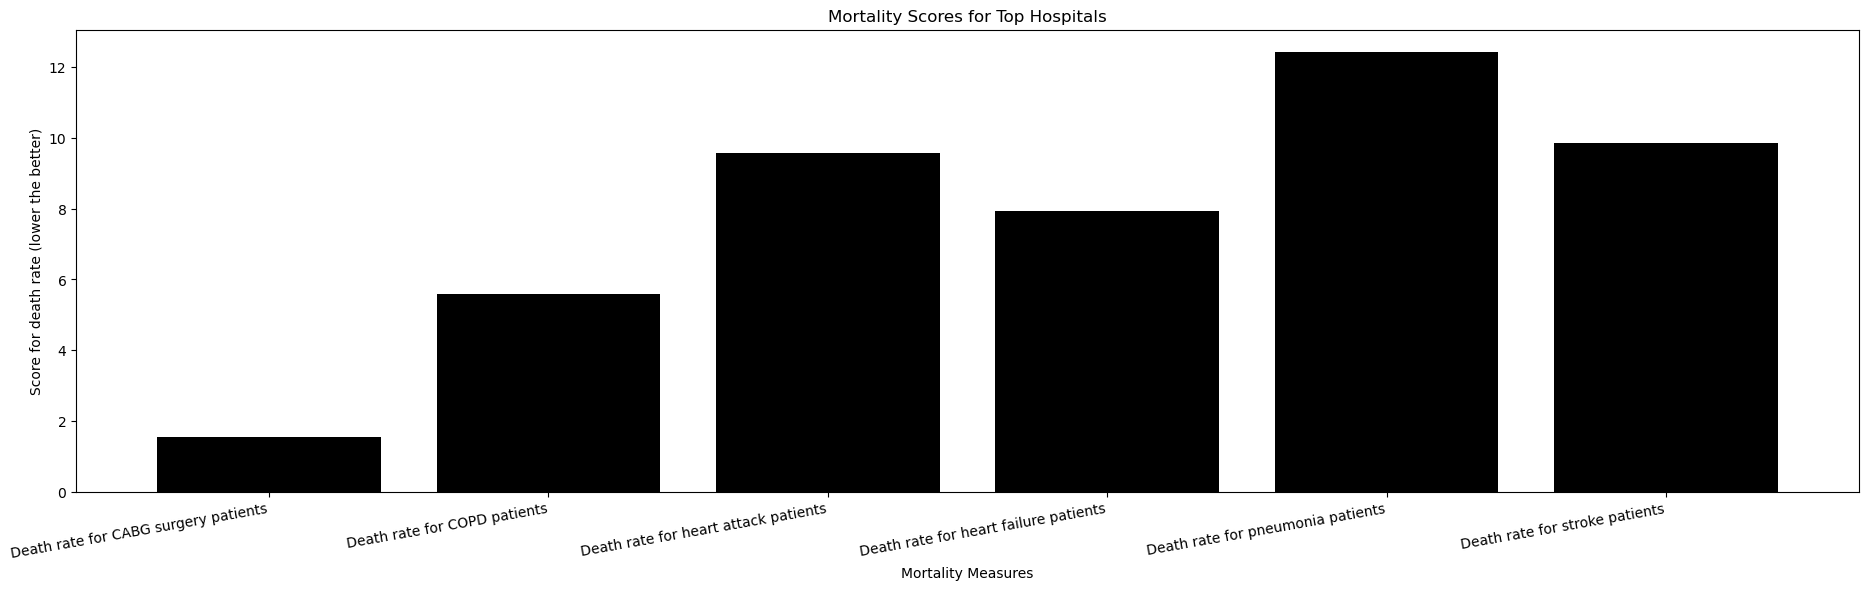

In [52]:
fig, ax = plt.subplots(figsize=(23, 6))

plt.bar(grouped_data_top_hospitals['Measure Name'],grouped_data_top_hospitals['Score'], color = 'black')
plt.ylabel('Score for death rate (lower the better)')
plt.xlabel('Mortality Measures')
plt.title('Mortality Scores for Top Hospitals')
plt.savefig('Mortality_for_top_hospitals.png')
plt.xticks(rotation=10, ha='right')
plt.show()

In [53]:
mergeddf_death_overallrating_1 = mergeddf_death_overallrating.loc[(mergeddf_death_overallrating['Hospital overall rating'] == 1) & (mergeddf_death_overallrating['Compared to National'] == 'Worse Than the National Rate')]
mergeddf_death_overallrating_1['Score'] = pd.to_numeric(mergeddf_death_overallrating_1['Score'])
mergeddf_death_overallrating_1

C:\Users\kevin\AppData\Local\Temp\ipykernel_2856\2598543962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergeddf_death_overallrating_1['Score'] = pd.to_numeric(mergeddf_death_overallrating_1['Score'])


,Facility ID,Facility Name,Measure Name,Compared to National,Score,Hospital overall rating
629,40036,BAPTIST HEALTH MEDICAL CENTER NORTH LITTLE ROCK,Death rate for pneumonia patients,Worse Than the National Rate,20.3,1.0
633,40039,ARKANSAS METHODIST MEDICAL CENTER,Death rate for heart failure patients,Worse Than the National Rate,17.2,1.0
653,40055,BAPTIST HEALTH - FORT SMITH,Death rate for heart failure patients,Worse Than the National Rate,13.7,1.0
682,40078,NATIONAL PARK MEDICAL CENTER,Death rate for heart failure patients,Worse Than the National Rate,15.8,1.0
700,40114,BAPTIST HEALTH MEDICAL CENTER-LITTLE ROCK,Death rate for heart failure patients,Worse Than the National Rate,14.5,1.0
...,...,...,...,...,...,...
11269,440063,JOHNSON CITY MEDICAL CENTER,Death rate for stroke patients,Worse Than the National Rate,19.0,1.0
11312,440104,ERLANGER MEDICAL CENTER,Death rate for COPD patients,Worse Than the National Rate,12.6,1.0
13098,510022,CHARLESTON AREA MEDICAL CENTER,Death rate for stroke patients,Worse Than the National Rate,20.0,1.0
13136,510050,"WHEELING HOSPITAL, INC",Death rate for pneumonia patients,Worse Than the National Rate,25.0,1.0


In [54]:
grouped_data_lowest_hospitals = mergeddf_death_overallrating_1.groupby(['Measure Name'])['Score'].mean().reset_index()
grouped_data_lowest_hospitals


,Measure Name,Score
0,Death rate for CABG surgery patients,5.200000
1,Death rate for COPD patients,11.966667
2,Death rate for heart attack patients,16.025000
3,Death rate for heart failure patients,15.346667
4,Death rate for pneumonia patients,21.650000
5,Death rate for stroke patients,18.727778


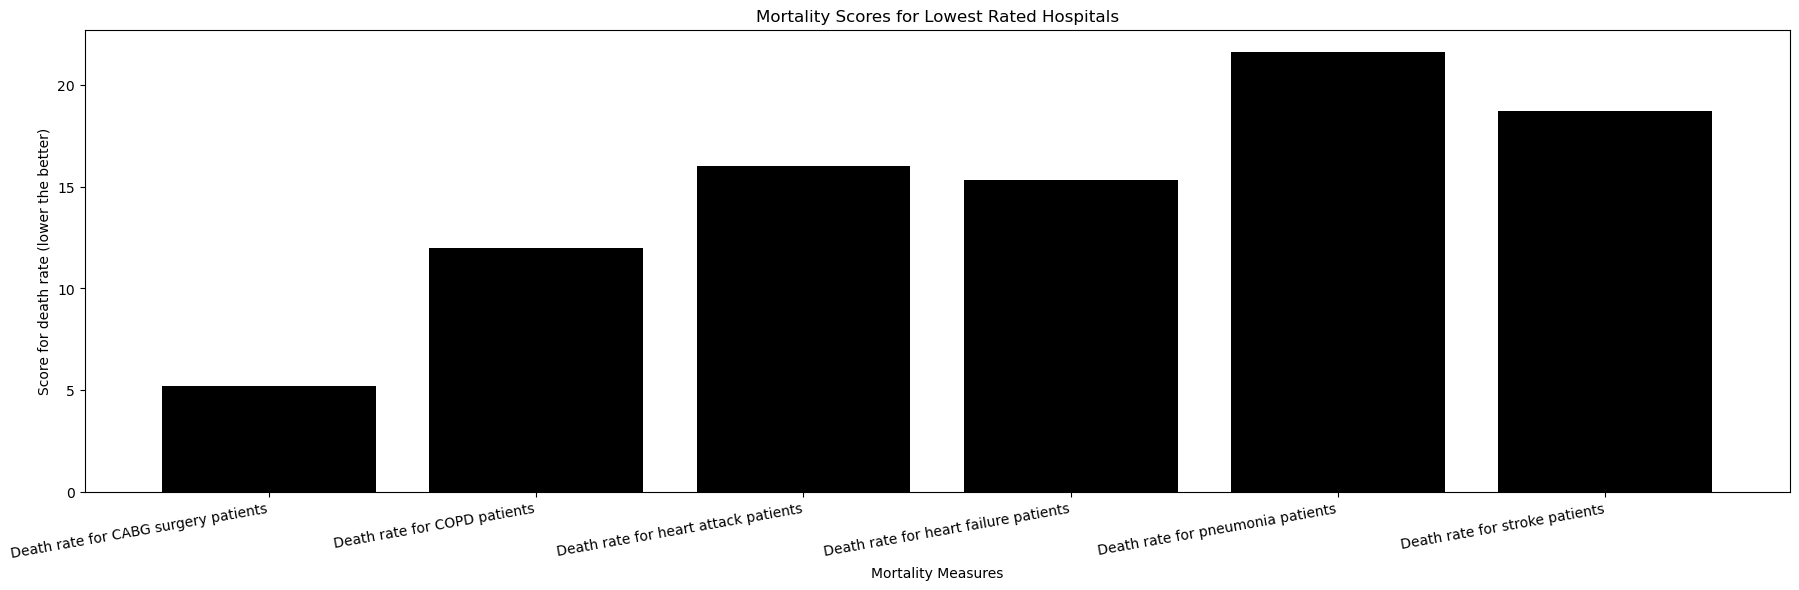

In [55]:
fig, ax = plt.subplots(figsize=(22, 6))

plt.bar(grouped_data_lowest_hospitals['Measure Name'],grouped_data_lowest_hospitals['Score'], color = 'black')
plt.ylabel('Score for death rate (lower the better)')
plt.xlabel('Mortality Measures')
plt.title('Mortality Scores for Lowest Rated Hospitals')
plt.savefig('Mortality_for_lowest_hospitals.png')
plt.xticks(rotation=10, ha='right')
plt.show()

In [56]:
mergeddf_death_overallrating_grouped = mergeddf_death_overallrating.groupby(['Compared to National'])['Hospital overall rating'].mean().reset_index()
mergeddf_death_overallrating_grouped

,Compared to National,Hospital overall rating
0,Better Than the National Rate,3.870763
1,No Different Than the National Rate,3.186954
2,Worse Than the National Rate,2.465116


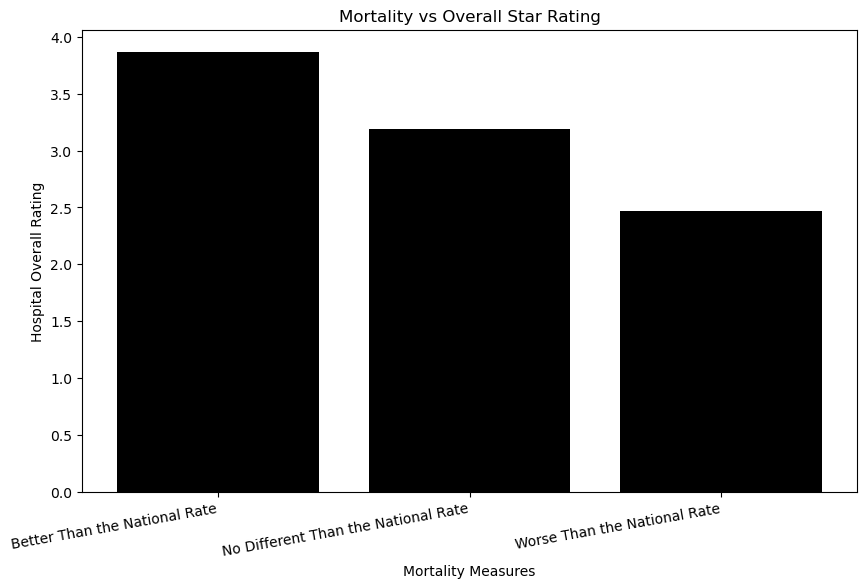

In [57]:
#plot out each by hospital quality rating
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(mergeddf_death_overallrating_grouped['Compared to National'],mergeddf_death_overallrating_grouped['Hospital overall rating'], color = 'black')
plt.ylabel('Hospital Overall Rating')
plt.xlabel('Mortality Measures')
plt.title('Mortality vs Overall Star Rating')
plt.savefig('Mortality_vs_Overall_Rating.png')
plt.xticks(rotation=10, ha='right')
plt.savefig('Mortality_Ratings.png')
plt.show()

Above here you can see the hospital rating correlate showing that the measures with better than the national rate have higher overral hospital ratings vs the ones that have worse than the national rate on average


HAI-1 - Central line-associated bloodstream infections (CLABSI) in ICUs and select wards (alternate Measure ID:
HAI_1_SIR)

HAI-2 - Catheter-associated urinary tract infections (CAUTI) in ICUs and select wards (alternate Measure ID:
HAI_2_SIR)

HAI-3 - Surgical Site Infection from colon surgery (SSI: Colon) (alternate Measure ID: HAI_3_SIR)

HAI-4 - Surgical Site Infection from abdominal hysterectomy (SSI: Hysterectomy) (alternate Measure ID:
HAI_4_SIR)

HAI-5 - Methicillin-resistant Staphylococcus aureus (or MRSA) blood laboratory-identified events (bloodstream
infections) (alternate Measure ID: HAI_5_SIR)

HAI-6 - Clostridium difficile (C.diff.) laboratory identified events (intestinal infections) (alternate Measure ID:
HAI_6_SIR)

# Healthcare Associated Infections - Hospital
The Healthcare-Associated Infection (HAI) measures - provider data. These measures are developed by Centers for Disease Control and Prevention (CDC) and collected through the National Healthcare Safety Network (NHSN). They provide information on infections that occur while the patient is in the hospital. These infections can be related to devices, such as central lines and urinary catheters, or spread from patient to patient after contact with an infected person or surface. Many healthcare associated infections can be prevented when the hospitals use CDC-recommended infection control steps.

In [58]:
csv_Infections_Path = Path("Healthcare_Associated_Infections-Hospital.csv")
csv_Infections_Path_df = pd.read_csv(csv_Infections_Path)
csv_Infections_Path_df['Compared to National'].replace(['Not Available'], np.nan)
csv_Infections_Path_clean = csv_Infections_Path_df.dropna(subset=['Compared to National'])
csv_Infections_Path_clean

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Score,Footnote,Start Date,End Date
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_CILOWER,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,0.404,NaN,07/01/2021,06/30/2022
1,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_CIUPPER,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,1.519,NaN,07/01/2021,06/30/2022
2,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_DOPC,Central Line Associated Bloodstream Infection:...,No Different than National Benchmark,10299,NaN,07/01/2021,06/30/2022
3,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_ELIGCASES,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,10.874,NaN,07/01/2021,06/30/2022
4,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,No Different than National Benchmark,9,NaN,07/01/2021,06/30/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174415,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,HAI_6_CIUPPER,Clostridium Difficile (C.Diff): Upper Confiden...,Not Available,Not Available,5,07/01/2021,06/30/2022
174416,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,HAI_6_DOPC,Clostridium Difficile (C.Diff): Patient Days,Not Available,Not Available,5,07/01/2021,06/30/2022
174417,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,HAI_6_ELIGCASES,Clostridium Difficile (C.Diff): Predicted Cases,Not Available,Not Available,5,07/01/2021,06/30/2022
174418,670319,TRINITY REGIONAL HOSPITAL SACHSE,4750 PRESIDENT GEORGE BUSH HIGHWAY,SACHSE,TX,75048,DALLAS,(469) 298-2599,HAI_6_NUMERATOR,Clostridium Difficile (C.Diff): Observed Cases,Not Available,Not Available,5,07/01/2021,06/30/2022


In [59]:
Infections_hospital_rating = pd.merge(csv_Infections_Path_clean, Rated_Hospitals_prep, how = 'inner', on = 'Facility ID')
Infections_hospital_rating

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Compared to National,Score,Footnote,Start Date,End Date,Hospital overall rating
0,100001,SHANDS JACKSONVILLE,655 W 8TH ST,JACKSONVILLE,FL,32209,DUVAL,(904) 244-4000,HAI_1_CILOWER,Central Line Associated Bloodstream Infection ...,Worse than the National Benchmark,1.137,NaN,07/01/2021,06/30/2022,2.0
1,100001,SHANDS JACKSONVILLE,655 W 8TH ST,JACKSONVILLE,FL,32209,DUVAL,(904) 244-4000,HAI_1_CIUPPER,Central Line Associated Bloodstream Infection ...,Worse than the National Benchmark,2.462,NaN,07/01/2021,06/30/2022,2.0
2,100001,SHANDS JACKSONVILLE,655 W 8TH ST,JACKSONVILLE,FL,32209,DUVAL,(904) 244-4000,HAI_1_DOPC,Central Line Associated Bloodstream Infection:...,Worse than the National Benchmark,13083,NaN,07/01/2021,06/30/2022,2.0
3,100001,SHANDS JACKSONVILLE,655 W 8TH ST,JACKSONVILLE,FL,32209,DUVAL,(904) 244-4000,HAI_1_ELIGCASES,Central Line Associated Bloodstream Infection ...,Worse than the National Benchmark,15.251,NaN,07/01/2021,06/30/2022,2.0
4,100001,SHANDS JACKSONVILLE,655 W 8TH ST,JACKSONVILLE,FL,32209,DUVAL,(904) 244-4000,HAI_1_NUMERATOR,Central Line Associated Bloodstream Infection ...,Worse than the National Benchmark,26,NaN,07/01/2021,06/30/2022,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92515,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,17201 INTERSTATE 45 SOUTH,THE WOODLANDS,TX,77385,MONTGOMERY,(936) 270-2000,HAI_6_CIUPPER,Clostridium Difficile (C.Diff): Upper Confiden...,Better than the National Benchmark,0.066,NaN,07/01/2021,06/30/2022,4.0
92516,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,17201 INTERSTATE 45 SOUTH,THE WOODLANDS,TX,77385,MONTGOMERY,(936) 270-2000,HAI_6_DOPC,Clostridium Difficile (C.Diff): Patient Days,Better than the National Benchmark,63451,NaN,07/01/2021,06/30/2022,4.0
92517,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,17201 INTERSTATE 45 SOUTH,THE WOODLANDS,TX,77385,MONTGOMERY,(936) 270-2000,HAI_6_ELIGCASES,Clostridium Difficile (C.Diff): Predicted Cases,Better than the National Benchmark,45.054,NaN,07/01/2021,06/30/2022,4.0
92518,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,17201 INTERSTATE 45 SOUTH,THE WOODLANDS,TX,77385,MONTGOMERY,(936) 270-2000,HAI_6_NUMERATOR,Clostridium Difficile (C.Diff): Observed Cases,Better than the National Benchmark,0,NaN,07/01/2021,06/30/2022,4.0


In [60]:
mergeddf_infection_overallrating_grouped = mergeddf_death_overallrating.groupby(['Compared to National'])['Hospital overall rating'].mean().reset_index()
mergeddf_infection_overallrating_grouped

,Compared to National,Hospital overall rating
0,Better Than the National Rate,3.870763
1,No Different Than the National Rate,3.186954
2,Worse Than the National Rate,2.465116


In [61]:
PSI90_cleaned = Death_Df_cleaned.loc[Death_Df_cleaned['Measure Name'] == 'CMS Medicare PSI 90: Patient safety and adverse events composite']
PSI90_cleaned

,Facility ID,Facility Name,Measure Name,Compared to National,Score
18,10001,SOUTHEAST HEALTH MEDICAL CENTER,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,1.01
37,10005,MARSHALL MEDICAL CENTERS,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,0.91
56,10006,NORTH ALABAMA MEDICAL CENTER,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,1.1
75,10007,MIZELL MEMORIAL HOSPITAL,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,0.99
113,10011,ST. VINCENT'S EAST,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,0.82
...,...,...,...,...,...
91750,670132,METHODIST SOUTHLAKE MEDICAL CENTER,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,1.02
91826,670136,BAYLOR SCOTT & WHITE MEDICAL CENTER- AUSTIN,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,0.99
91883,670260,TEXAS HEALTH HOSPITAL FRISCO,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,0.97
91978,670300,METHODIST MIDLOTHIAN MEDICAL CENTER,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,1


In [62]:
PSI90_rating_merged = pd.merge(PSI90_cleaned, Rated_Hospitals_prep, how = 'inner', on = 'Facility ID')
PSI90_rating_merged

,Facility ID,Facility Name,Measure Name,Compared to National,Score,Hospital overall rating
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,1.01,3.0
1,10005,MARSHALL MEDICAL CENTERS,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,0.91,3.0
2,10006,NORTH ALABAMA MEDICAL CENTER,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,1.1,2.0
3,10007,MIZELL MEMORIAL HOSPITAL,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,0.99,3.0
4,10011,ST. VINCENT'S EAST,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,0.82,2.0
...,...,...,...,...,...,...
2692,670103,MEDICAL CITY ALLIANCE,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,0.89,4.0
2693,670106,HCA HOUSTON HEALTHCARE PEARLAND,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,0.92,1.0
2694,670108,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,0.89,5.0
2695,670120,THE HOSPITALS OF PROVIDENCE TRANSMOUNTAIN CAMPUS,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,1.07,3.0


# Complications: Surgical Complications – CMS Patient Safety Indicators (PSIs)
Description/Background

Measures of serious complications are drawn from the Agency for Healthcare Research and Quality (AHRQ)
Patient Safety Indicators (PSIs). **The overall score for serious complications is based on how often adult patients had certain serious, but potentially preventable, complications related to medical or surgical inpatient
hospital care. The CMS PSIs reflect quality of care for hospitalized adults and focus on potentially avoidable complications and iatrogenic events.** CMS PSIs only apply to Medicare beneficiaries who were discharged
from a hospital paid through the IPPS. These indicators are risk adjusted to account for differences in hospital patients’ characteristics. CMS calculates rates for CMS PSIs using Medicare claims data and a statistical
model that determines the interval estimates for the PSIs. 
CMS publicly reports data on two PSIs—PSI-4 (death rate among surgical patients with serious treatable complications) and the composite measure PSI-90.
PSI-90 is composed of 11 NQF-endorsed measures, including PSI-3 (pressure ulcer rate), PSI-6 (iatrogenic
pneumothorax rate), PSI-8 (postoperative hip fracture rate), PSI-9 (postoperative hemorrhage or hematoma
rate), PSI-10 (postoperative physiologic and metabolic derangement rate), PSI-11 (postoperative respiratory
failure rate), PSI-12 (postoperative pulmonary embolism or deep vein thrombosis rate), PSI-13 (postoperative
sepsis rate), PSI-14 (postoperative wound dehiscence rate), and PSI-15 (accidental puncture or laceration rate).
PSI-90’s composite rate is the weighted average of its component indicators. Hospitals’ PSI rates are
compared to the national rate to determine if hospitals’ performance on PSIs is better than the national rate
(lower), no different than the national rate, or worse than the national rate (higher).
Please note that the Patient Safety Indicator (PSI)-90 data were not refreshed in July 2017. The data were
updated as part of the October 2017 release. Diagnosis coding switched from ICD-9 to ICD-10 in 2015. Data
for the FY 2018 recalibrated PSI measures only represent the 15-month performance period of ICD-9 claims
(7/1/14 to 9/30/15).

In [63]:
psi90_ratings_groupby = PSI90_rating_merged.groupby(['Compared to National'])['Hospital overall rating'].mean().reset_index()
psi90_ratings_groupby

,Compared to National,Hospital overall rating
0,Better Than the National Value,3.811881
1,No Different Than the National Value,3.216800
2,Worse Than the National Value,2.302083


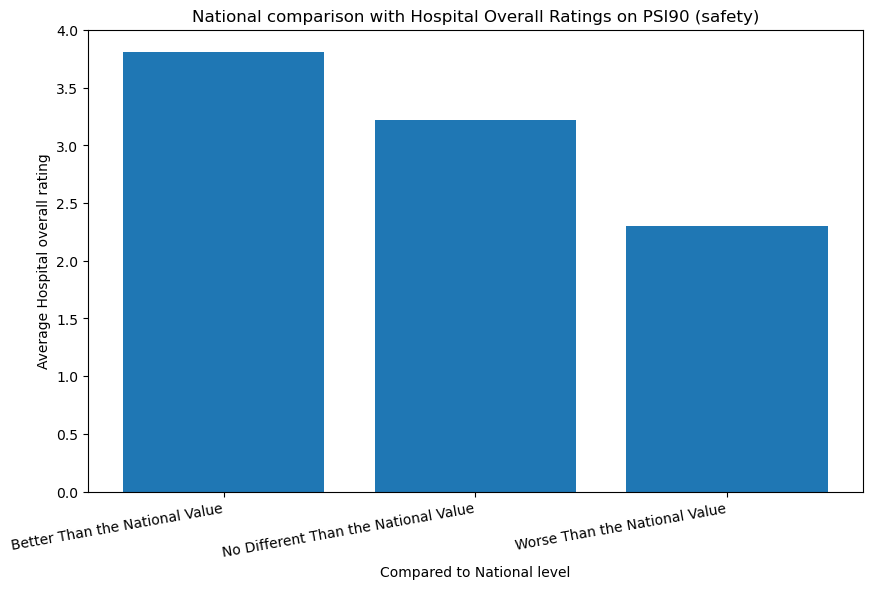

In [64]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(psi90_ratings_groupby['Compared to National'],psi90_ratings_groupby['Hospital overall rating'])
plt.ylabel('Average Hospital overall rating')
plt.xlabel('Compared to National level')
plt.title('National comparison with Hospital Overall Ratings on PSI90 (safety)')
plt.xticks(rotation=10, ha='right')
plt.savefig('Overall_Ratings_vs_PSI90.png')
plt.show()


In [65]:
safety_df_measures = Death_Df_cleaned.loc[Death_Df_cleaned['Measure Name'].isin([
    'Pressure ulcer rate',
    'Death rate among surgical inpatients with serious treatable complications',
    'Iatrogenic pneumothorax rate',
    'In-hospital fall with hip fracture rate',
    'Postoperative hemorrhage or hematoma rate',
    'Postoperative acute kidney injury requiring dialysis rate',
    'Postoperative respiratory failure rate',
    'Perioperative pulmonary embolism or deep vein thrombosis rate',
    'Postoperative sepsis rate',
    'Postoperative wound dehiscence rate',
    'Abdominopelvic accidental puncture or laceration rate',
    'CMS Medicare PSI 90: Patient safety and adverse events composite'
])]
safety_df_measures

,Facility ID,Facility Name,Measure Name,Compared to National,Score
7,10001,SOUTHEAST HEALTH MEDICAL CENTER,Pressure ulcer rate,No Different Than the National Rate,0.23
8,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate among surgical inpatients with seri...,No Different Than the National Rate,173.39
9,10001,SOUTHEAST HEALTH MEDICAL CENTER,Iatrogenic pneumothorax rate,No Different Than the National Rate,0.17
10,10001,SOUTHEAST HEALTH MEDICAL CENTER,In-hospital fall with hip fracture rate,No Different Than the National Rate,0.1
11,10001,SOUTHEAST HEALTH MEDICAL CENTER,Postoperative hemorrhage or hematoma rate,No Different Than the National Rate,2.33
...,...,...,...,...,...
91978,670300,METHODIST MIDLOTHIAN MEDICAL CENTER,CMS Medicare PSI 90: Patient safety and advers...,No Different Than the National Value,1
91986,670309,TEXAS HEALTH HOSPITAL MANSFIELD,Pressure ulcer rate,No Different Than the National Rate,0.53
91988,670309,TEXAS HEALTH HOSPITAL MANSFIELD,Iatrogenic pneumothorax rate,No Different Than the National Rate,0.19
91989,670309,TEXAS HEALTH HOSPITAL MANSFIELD,In-hospital fall with hip fracture rate,No Different Than the National Rate,0.07


In [78]:
safety_df_measures_merged = pd.merge(safety_df_measures, Rated_Hospitals_prep, how = 'inner', on = 'Facility ID')
safety_df_measures_merged 

,Facility ID,Facility Name,Measure Name,Compared to National,Score,Hospital overall rating
0,10001,SOUTHEAST HEALTH MEDICAL CENTER,Pressure ulcer rate,No Different Than the National Rate,0.23,3.0
1,10001,SOUTHEAST HEALTH MEDICAL CENTER,Death rate among surgical inpatients with seri...,No Different Than the National Rate,173.39,3.0
2,10001,SOUTHEAST HEALTH MEDICAL CENTER,Iatrogenic pneumothorax rate,No Different Than the National Rate,0.17,3.0
3,10001,SOUTHEAST HEALTH MEDICAL CENTER,In-hospital fall with hip fracture rate,No Different Than the National Rate,0.1,3.0
4,10001,SOUTHEAST HEALTH MEDICAL CENTER,Postoperative hemorrhage or hematoma rate,No Different Than the National Rate,2.33,3.0
...,...,...,...,...,...,...
29691,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Perioperative pulmonary embolism or deep vein ...,No Different Than the National Rate,3.54,4.0
29692,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Postoperative sepsis rate,No Different Than the National Rate,3.11,4.0
29693,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Postoperative wound dehiscence rate,No Different Than the National Rate,0.71,4.0
29694,670122,HOUSTON METHODIST THE WOODLANDS HOSPITAL,Abdominopelvic accidental puncture or lacerati...,No Different Than the National Rate,0.73,4.0


In [67]:
safety_df_measures_merged_top = safety_df_measures_merged.loc[safety_df_measures_merged['Hospital overall rating'] == 5] 
safety_df_measures_merged_top['Score'] = pd.to_numeric(safety_df_measures_merged_top['Score'], errors='coerce')
safety_df_measures_merged_top = safety_df_measures_merged_top.dropna(subset=['Score']).astype({'Score': int})
safety_df_measures_merged_top


C:\Users\kevin\AppData\Local\Temp\ipykernel_2856\4252242634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  safety_df_measures_merged_top['Score'] = pd.to_numeric(safety_df_measures_merged_top['Score'], errors='coerce')


,Facility ID,Facility Name,Measure Name,Compared to National,Score,Hospital overall rating
270,10065,RUSSELL MEDICAL CENTER,Pressure ulcer rate,No Different Than the National Rate,0,5.0
271,10065,RUSSELL MEDICAL CENTER,Iatrogenic pneumothorax rate,No Different Than the National Rate,0,5.0
272,10065,RUSSELL MEDICAL CENTER,In-hospital fall with hip fracture rate,No Different Than the National Rate,0,5.0
273,10065,RUSSELL MEDICAL CENTER,Postoperative hemorrhage or hematoma rate,No Different Than the National Rate,2,5.0
274,10065,RUSSELL MEDICAL CENTER,Perioperative pulmonary embolism or deep vein ...,No Different Than the National Rate,3,5.0
...,...,...,...,...,...,...
29671,670108,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,Perioperative pulmonary embolism or deep vein ...,No Different Than the National Rate,3,5.0
29672,670108,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,Postoperative sepsis rate,No Different Than the National Rate,3,5.0
29673,670108,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,Postoperative wound dehiscence rate,No Different Than the National Rate,0,5.0
29674,670108,BAYLOR SCOTT & WHITE MEDICAL CENTER - MARBLE F...,Abdominopelvic accidental puncture or lacerati...,No Different Than the National Rate,0,5.0


In [68]:
safety_df_measures_merged_top_group = safety_df_measures_merged_top.groupby(['Measure Name'])['Score'].mean().reset_index()
safety_df_measures_merged_top_group = safety_df_measures_merged_top_group.loc[safety_df_measures_merged_top_group['Score'] != 0]
safety_df_measures_merged_top_group = safety_df_measures_merged_top_group.sort_values('Measure Name')

safety_df_measures_merged_top_group

,Measure Name,Score
0,Abdominopelvic accidental puncture or lacerati...,0.506812
1,CMS Medicare PSI 90: Patient safety and advers...,0.174603
2,Death rate among surgical inpatients with seri...,133.063291
5,Perioperative pulmonary embolism or deep vein ...,2.830189
6,Postoperative acute kidney injury requiring di...,0.134111
7,Postoperative hemorrhage or hematoma rate,1.959569
8,Postoperative respiratory failure rate,4.970845
9,Postoperative sepsis rate,3.311953
10,Postoperative wound dehiscence rate,0.103858
11,Pressure ulcer rate,0.117188


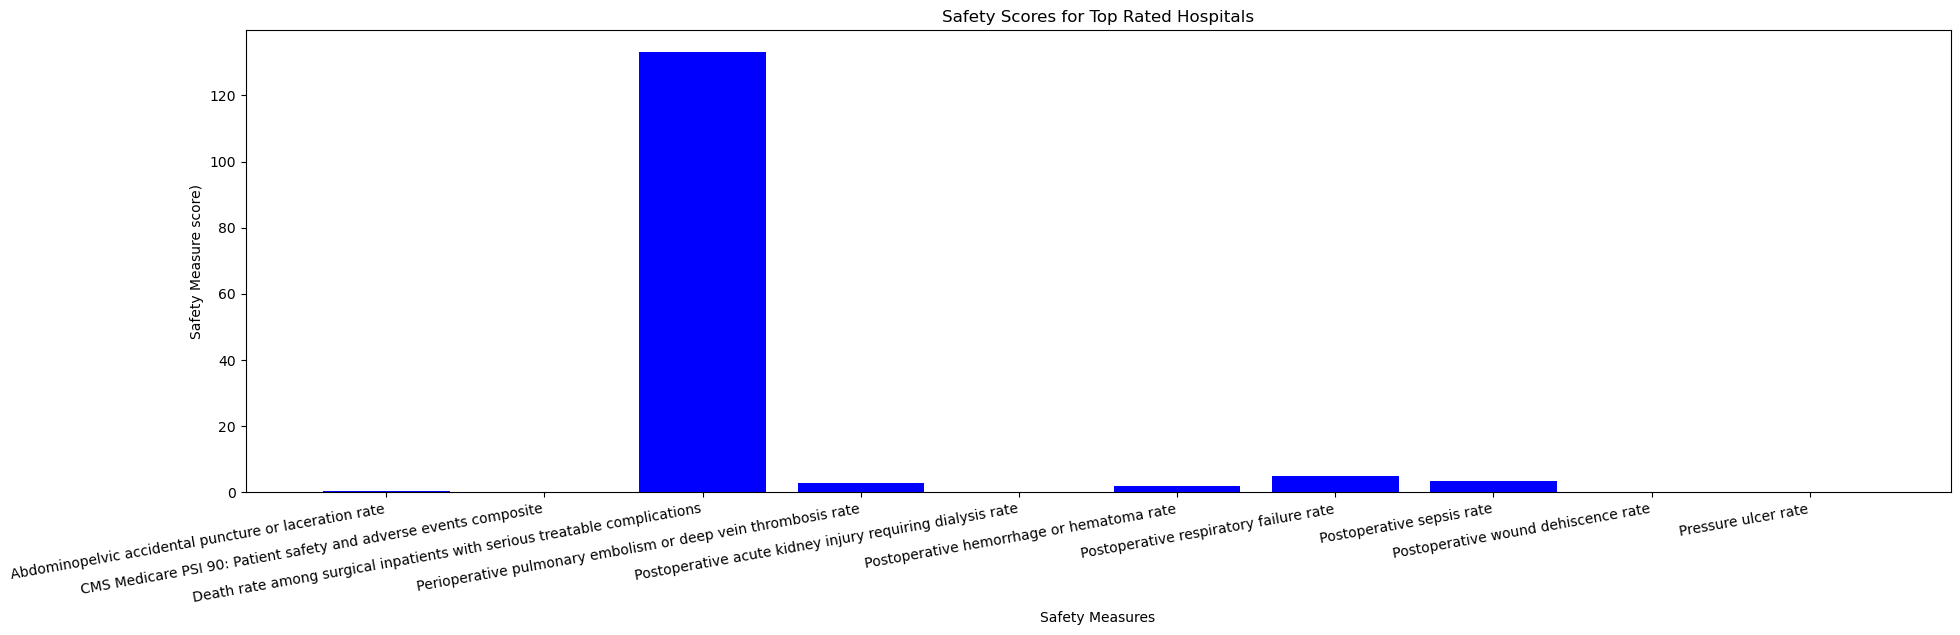

In [69]:
fig, ax = plt.subplots(figsize=(22, 6))

plt.bar(safety_df_measures_merged_top_group['Measure Name'],safety_df_measures_merged_top_group['Score'], color = 'blue')
plt.ylabel('Safety Measure score)')
plt.xlabel('Safety Measures')
plt.title('Safety Scores for Top Rated Hospitals')
plt.savefig('Safety_Top.png')
plt.xticks(rotation=10, ha='right')
plt.show()

In [79]:
safety_df_measures_merged1 = safety_df_measures_merged.loc[safety_df_measures_merged['Hospital overall rating'] == 1]
safety_df_measures_merged1['Score'] = pd.to_numeric(safety_df_measures_merged1['Score'], errors='coerce')
safety_df_measures_merged1 = safety_df_measures_merged1.dropna(subset=['Score'])
safety_df_measures_merged1


C:\Users\kevin\AppData\Local\Temp\ipykernel_2856\2641599447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  safety_df_measures_merged1['Score'] = pd.to_numeric(safety_df_measures_merged1['Score'], errors='coerce')


,Facility ID,Facility Name,Measure Name,Compared to National,Score,Hospital overall rating
1388,40036,BAPTIST HEALTH MEDICAL CENTER NORTH LITTLE ROCK,Pressure ulcer rate,No Different Than the National Rate,0.31,1.0
1389,40036,BAPTIST HEALTH MEDICAL CENTER NORTH LITTLE ROCK,Death rate among surgical inpatients with seri...,No Different Than the National Rate,177.64,1.0
1390,40036,BAPTIST HEALTH MEDICAL CENTER NORTH LITTLE ROCK,Iatrogenic pneumothorax rate,No Different Than the National Rate,0.15,1.0
1391,40036,BAPTIST HEALTH MEDICAL CENTER NORTH LITTLE ROCK,In-hospital fall with hip fracture rate,No Different Than the National Rate,0.05,1.0
1392,40036,BAPTIST HEALTH MEDICAL CENTER NORTH LITTLE ROCK,Postoperative hemorrhage or hematoma rate,No Different Than the National Rate,1.94,1.0
...,...,...,...,...,...,...
29660,670106,HCA HOUSTON HEALTHCARE PEARLAND,Perioperative pulmonary embolism or deep vein ...,No Different Than the National Rate,3.16,1.0
29661,670106,HCA HOUSTON HEALTHCARE PEARLAND,Postoperative sepsis rate,No Different Than the National Rate,3.99,1.0
29662,670106,HCA HOUSTON HEALTHCARE PEARLAND,Postoperative wound dehiscence rate,No Different Than the National Rate,0.79,1.0
29663,670106,HCA HOUSTON HEALTHCARE PEARLAND,Abdominopelvic accidental puncture or lacerati...,No Different Than the National Rate,1.00,1.0


In [80]:
safety_df_measures_merged_low_group = safety_df_measures_merged1.groupby(['Measure Name'])['Score'].mean().reset_index()
safety_df_measures_merged_low_group = safety_df_measures_merged_low_group.merge(safety_df_measures_merged_low_group[['Measure Name']], on='Measure Name')
safety_df_measures_merged_low_group = safety_df_measures_merged_low_group.sort_values('Measure Name')
safety_df_measures_merged_low_group

,Measure Name,Score
0,Abdominopelvic accidental puncture or lacerati...,1.098488
1,CMS Medicare PSI 90: Patient safety and advers...,1.114884
2,Death rate among surgical inpatients with seri...,151.051981
3,Iatrogenic pneumothorax rate,0.192614
4,In-hospital fall with hip fracture rate,0.080909
5,Perioperative pulmonary embolism or deep vein ...,3.661706
6,Postoperative acute kidney injury requiring di...,0.992552
7,Postoperative hemorrhage or hematoma rate,2.383571
8,Postoperative respiratory failure rate,7.408759
9,Postoperative sepsis rate,4.545245


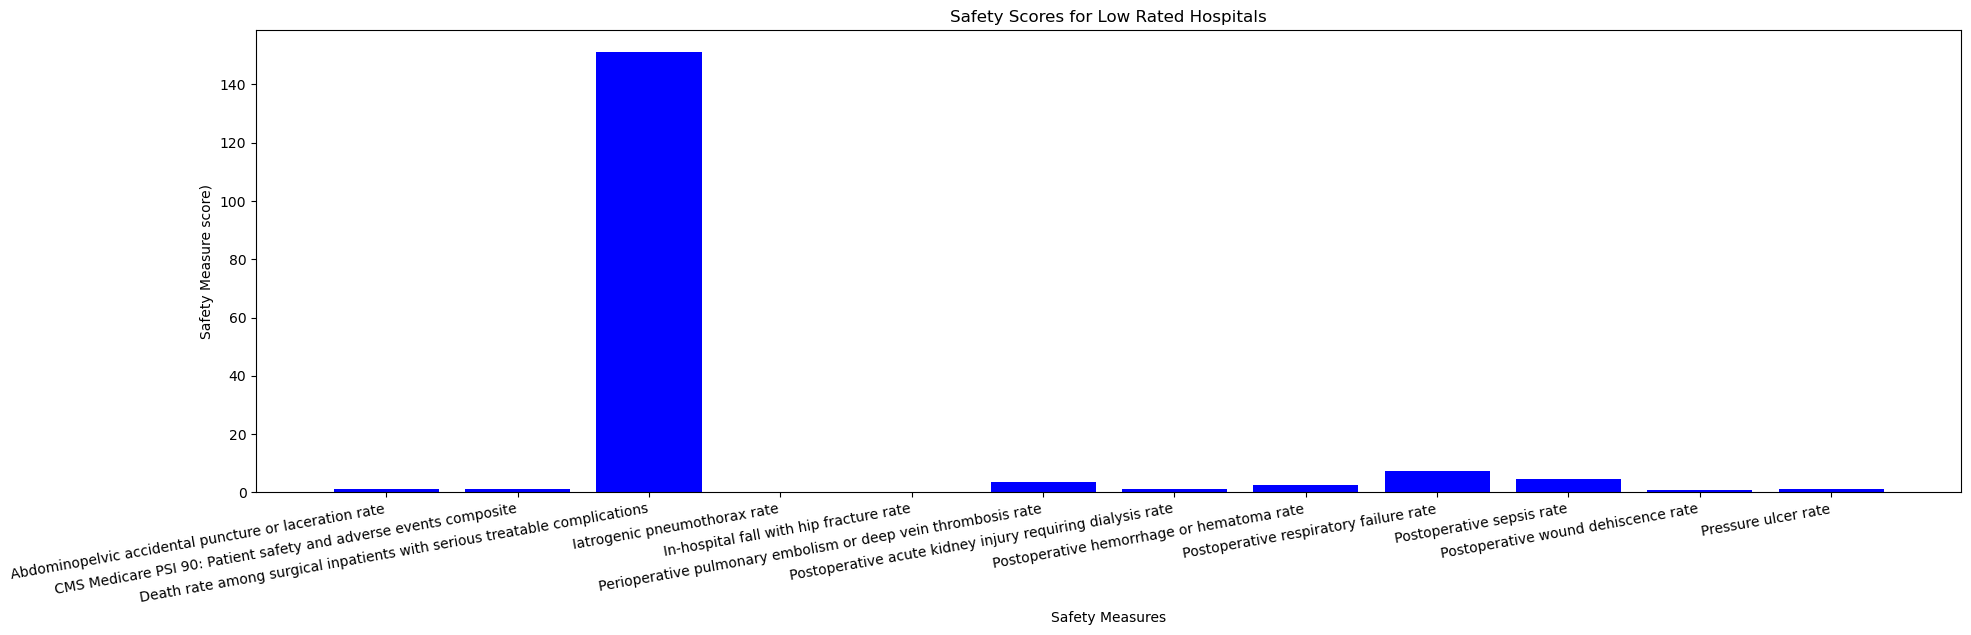

In [81]:
fig, ax = plt.subplots(figsize=(22, 6))

plt.bar(safety_df_measures_merged_low_group['Measure Name'],safety_df_measures_merged_low_group['Score'], color = 'blue')
plt.ylabel('Safety Measure score)')
plt.xlabel('Safety Measures')
plt.title('Safety Scores for Low Rated Hospitals')
plt.savefig('Safety_Low.png')
plt.xticks(rotation=10, ha='right')
plt.show()

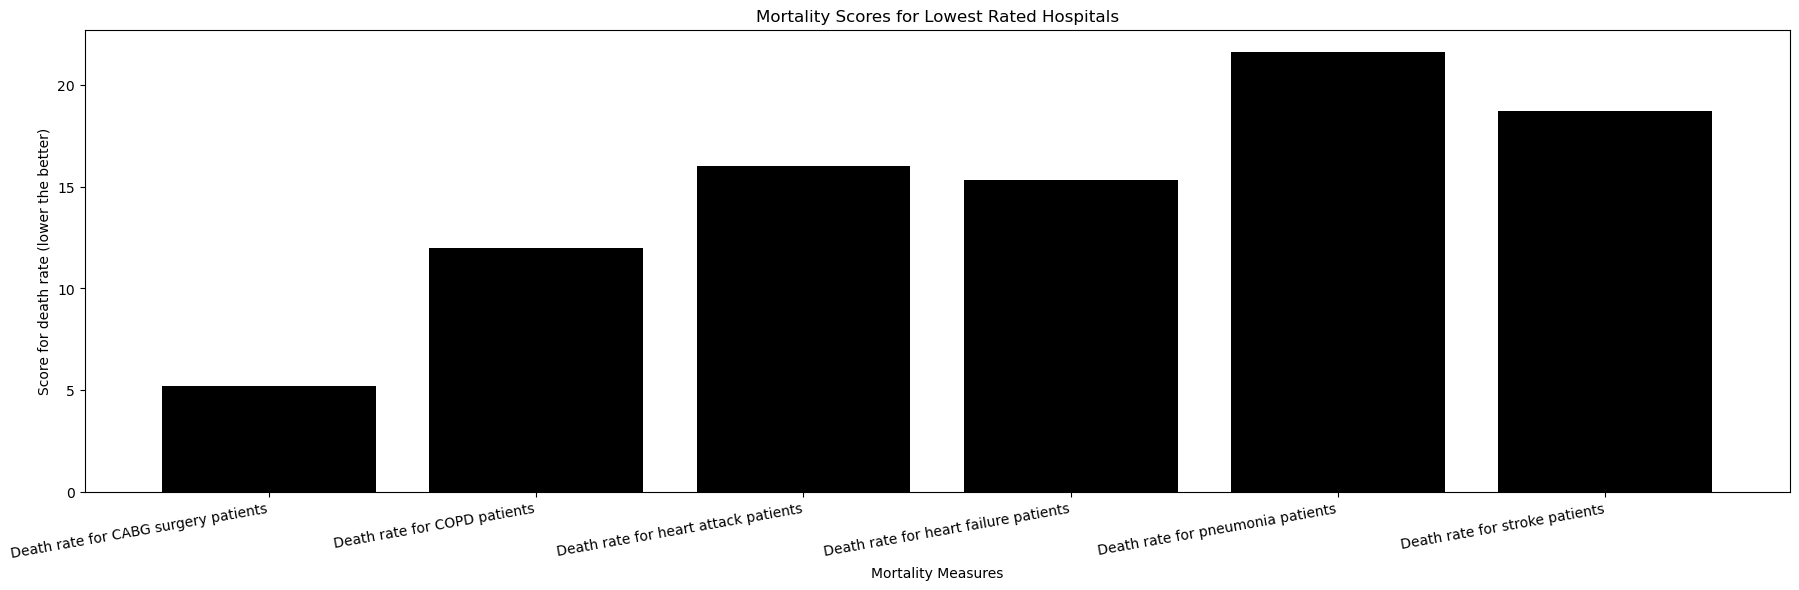

In [82]:
fig, ax = plt.subplots(figsize=(22, 6))

plt.bar(grouped_data_lowest_hospitals['Measure Name'],grouped_data_lowest_hospitals['Score'], color = 'black')
plt.ylabel('Score for death rate (lower the better)')
plt.xlabel('Mortality Measures')
plt.title('Mortality Scores for Lowest Rated Hospitals')
#plt.savefig('Mortality_for_lowest_hospitals.png')
plt.xticks(rotation=10, ha='right')
plt.show()